In [2]:
import numpy as np
import glob
import xrayutilities as xu
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib import ticker, cm, colors
import pandas as pd
import seaborn as sns

# %matplotlib notebook

file = './xrd/set_3/YG035-SRO001-STO001-RSM-06152022.xrdml'

curve_shape = xu.io.getxrdml_scan(file)[0].shape
omega, two_theta, intensity = xu.io.panalytical_xml.getxrdml_map(file)

omega = omega.reshape(curve_shape)
two_theta = two_theta.reshape(curve_shape)
intensity = intensity.reshape(curve_shape)
intensity[intensity==0]=1

wavelength = 1.54
Qy = 1/wavelength*(np.sin(np.deg2rad(two_theta-omega))+np.sin(np.deg2rad(omega)))
Qx = 1/wavelength*(np.cos(np.deg2rad(omega))-np.cos(np.deg2rad(two_theta-omega)))

data = {'Qx': np.round(Qx, 4).flatten(), 'Qy': np.round(Qy, 4).flatten(), 
        'intensity':intensity.flatten()}
df = pd.DataFrame(data)
df = df.drop_duplicates(subset=['Qx', 'Qy'])
df = df.pivot_table("intensity", "Qy", "Qx", fill_value=1.0).astype(np.float32)
df

Qx      0.2132  0.2133  0.2134  0.2135  0.2136  0.2137  0.2138  0.2139  \
Qy                                                                       
0.7487     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0   
0.7488     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0   
0.7489     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0   
0.7490     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0   
0.7491     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0   
...        ...     ...     ...     ...     ...     ...     ...     ...   
0.7814     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0   
0.7815     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0   
0.7816     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0   
0.7817     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0   
0.7818     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0   

Qx      0.2140  0.2141  ...  0.2892  0.2893  0.2894  0.2895  0.2896  0.2897  \
Qy                      ...                                                   
0.7487     1.0     1.0  ...     1.0     1.0     1.0     1.0     1.0     1.0   
0.7488     1.0     1.0  ...     1.0     1.0     1.0     1.0     1.0     1.0   
0.7489     1.0     1.0  ...     1.0     1.0     1.0     1.0     1.0     1.0   
0.7490     1.0     1.0  ...     1.0     1.0     1.0     1.0     1.0     1.0   
0.7491     1.0     1.0  ...     1.0     1.0     1.0     1.0     1.0     1.0   
...        ...     ...  ...     ...     ...     ...     ...     ...     ...   
0.7814     1.0     1.0  ...     1.0     1.0     1.0     1.0     1.0     1.0   
0.7815     1.0     1.0  ...     1.0     1.0     1.0     1.0     1.0     1.0   
0.7816     1.0     1.0  ...     1.0     1.0     1.0     1.0     1.0     1.0   
0.7817     1.0     1.0  ...     1.0     1.0     1.0     1.0     1.0     1.0   
0.7818     1.0     1.0  ...     1.0     1.0     1.0     1.0     1.0     1.0   

Qx      0.2898  0.2899  0.2900  0.2901  
Qy                                      
0.7487     1.0     1.0     1.0     1.0  
0.7488     1.0     1.0     1.0     1.0  
0.7489     1.0     1.0     1.0     1.0  
0.7490     1.0     1.0     1.0     1.0  
0.7491     1.0     1.0     1.0     1.0  
...        ...     ...     ...     ...  
0.7814     1.0     1.0     1.0     1.0  
0.7815     1.0     1.0     1.0     1.0  
0.7816     1.0     1.0     1.0     1.0  
0.7817     1.0     1.0     1.0     1.0  
0.7818     1.0     1.0     1.0     1.0  

[332 rows x 770 columns]

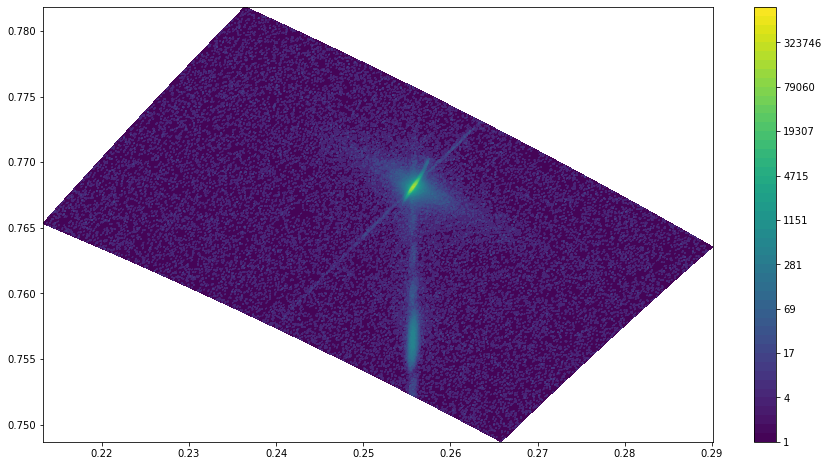

In [5]:
n_levels = 50
fig, ax = plt.subplots(figsize=(15, 8))
cs = ax.contourf(Qx, Qy, intensity,
                 np.logspace(0, 6, n_levels),
                 locator=ticker.LogLocator(), cmap=cm.viridis, norm=colors.LogNorm())

cbar = fig.colorbar(cs)
plt.show()

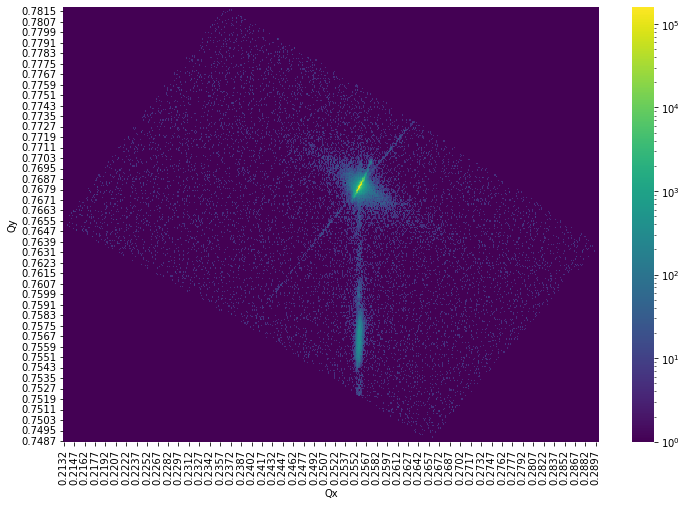

In [3]:
%matplotlib inline

plt.figure(figsize=(12, 8))
ax = sns.heatmap(data=df, cmap=cm.viridis, cbar=True, norm=colors.LogNorm())
ax.invert_yaxis()
plt.show()

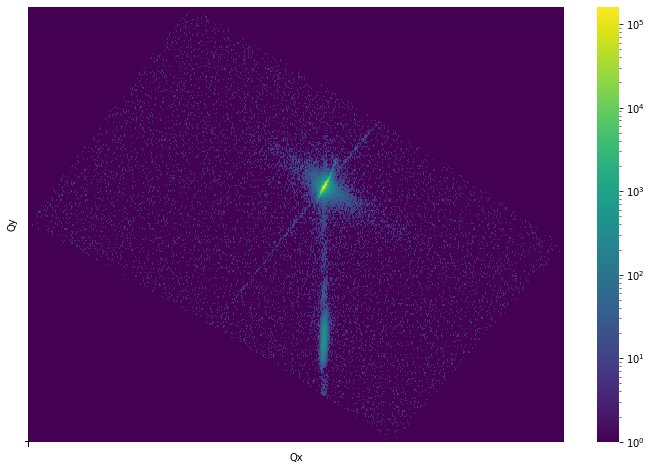

In [42]:
%matplotlib inline

plt.figure(figsize=(12, 8))

xt = np.linspace(df.columns.min(), df.columns.max(), 10)
yt = np.linspace(df.index.min(), df.index.max(), 10)

ax = sns.heatmap(data=df, cmap=cm.viridis, cbar=True, norm=colors.LogNorm())
ax.invert_yaxis()
ax.set_xticks(xt)
ax.set_yticks(yt)
plt.show()

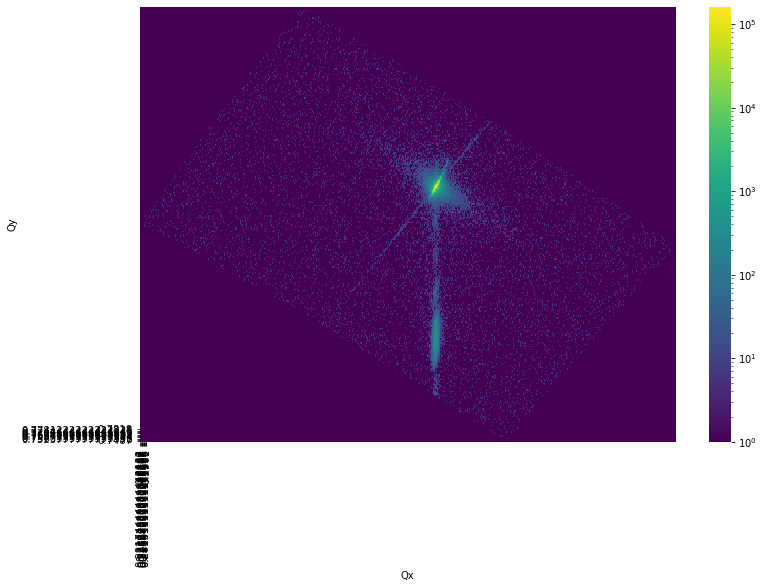

In [39]:
%matplotlib inline

plt.figure(figsize=(12, 8))

xt = np.linspace(df.columns.min(), df.columns.max(), 10)
yt = np.linspace(df.index.min(), df.index.max(), 10)

ax = sns.heatmap(data=df, cmap=cm.viridis, cbar=True, norm=colors.LogNorm(),
                 xticklabels=xt, yticklabels=yt)
ax.invert_yaxis()
plt.show()

In [75]:
import numpy as np
import glob
import xrayutilities as xu
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib import ticker, cm, colors

def plot_rsm(file):
    curve_shape = xu.io.getxrdml_scan(file)[0].shape
    omega, two_theta, intensity = xu.io.panalytical_xml.getxrdml_map(file)

    omega = omega.reshape(curve_shape)
    two_theta = two_theta.reshape(curve_shape)
    intensity = intensity.reshape(curve_shape)
    intensity[intensity==0]=1
    
    wavelength = 1.54
    Qy = 1/wavelength*(np.sin(np.deg2rad(two_theta-omega))+np.sin(np.deg2rad(omega)))
    Qx = 1/wavelength*(np.cos(np.deg2rad(omega))-np.cos(np.deg2rad(two_theta-omega)))

    n_levels = 50
    fig, ax = plt.subplots(figsize=(15, 8))
    cs = ax.contourf(Qx, Qy, intensity,
                     np.logspace(np.log10(intensity.min()),np.log10(intensity.max()), n_levels),
                     locator=ticker.LogLocator(), cmap=cm.jet, norm=colors.LogNorm())

    cbar = fig.colorbar(cs)
#     cbar.locator = ticker.LogLocator(10)
#     cbar.set_ticks(cbar.locator.tick_values(intensity.min(), intensity.max()))
#     cbar.minorticks_off()
    
    plt.show()

for file in glob.glob('./xrd/set_1/*RSM*')[:1]:
    print(file)
    plot_rsm(file)

./xrd/set_1/YG028-SRO001-STO001-scan_2-RSM_3-06092022.xrdml


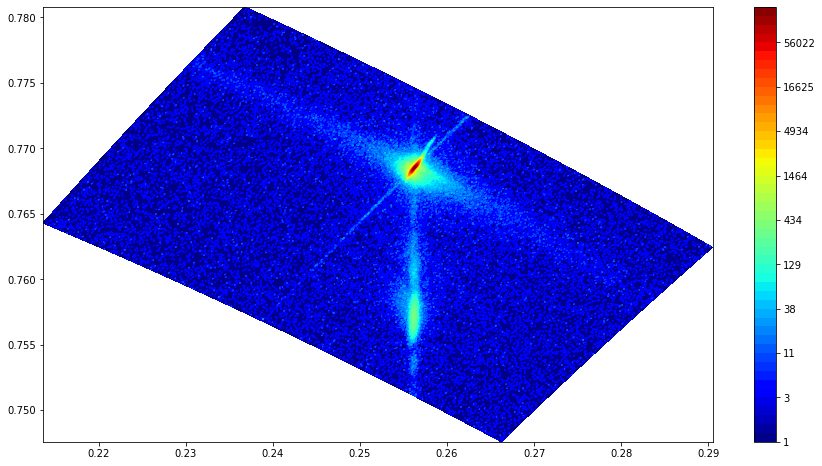

In [76]:
for file in glob.glob('./xrd/set_1/*RSM*')[:1]:
    print(file)
    plot_rsm(file)

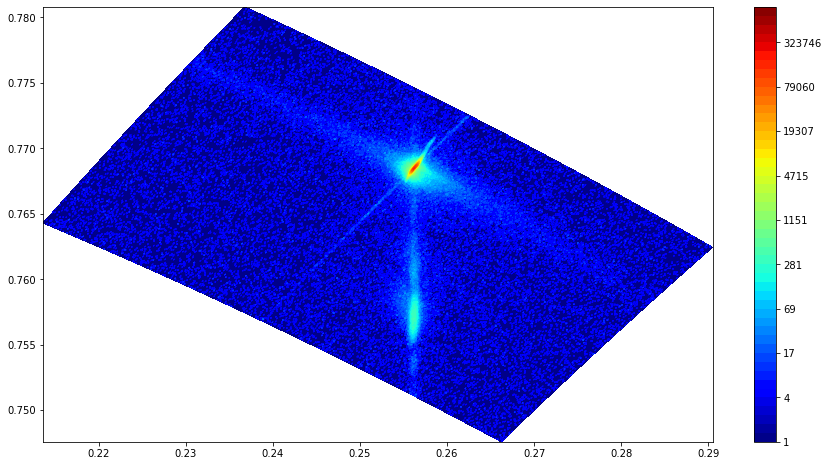

In [88]:
    curve_shape = xu.io.getxrdml_scan(file)[0].shape
    omega, two_theta, intensity = xu.io.panalytical_xml.getxrdml_map(file)

    omega = omega.reshape(curve_shape)
    two_theta = two_theta.reshape(curve_shape)
    intensity = intensity.reshape(curve_shape)
    intensity[intensity==0]=1
    
    wavelength = 1.54
    Qy = 1/wavelength*(np.sin(np.deg2rad(two_theta-omega))+np.sin(np.deg2rad(omega)))
    Qx = 1/wavelength*(np.cos(np.deg2rad(omega))-np.cos(np.deg2rad(two_theta-omega)))

    n_levels = 50
    fig, ax = plt.subplots(figsize=(15, 8))
    cs = ax.contourf(Qx, Qy, intensity,
                     np.logspace(0, 6, n_levels),
                     locator=ticker.LogLocator(), cmap=cm.jet, norm=colors.LogNorm())

    cbar = fig.colorbar(cs)
#     cbar.locator = ticker.LogLocator(10)
#     cbar.set_ticks(cbar.locator.tick_values(intensity.min(), intensity.max()))
#     cbar.minorticks_off()
    
    plt.show()

In [ ]:
file = './xrd/YG031-SRO001-STO001-RSM-06122022.xrdml'
curve_shape = xu.io.getxrdml_scan(file)[0].shape
omega, two_theta, intensity = xu.io.panalytical_xml.getxrdml_map(file)

omega = omega.reshape(curve_shape)
two_theta = two_theta.reshape(curve_shape)
intensity = intensity.reshape(curve_shape)
intensity[intensity==0]=1

wavelength = 1.54
Qy = 1/wavelength*(np.sin(np.deg2rad(two_theta-omega))+np.sin(np.deg2rad(omega)))
Qx = 1/wavelength*(np.cos(np.deg2rad(omega))-np.cos(np.deg2rad(two_theta-omega)))

%matplotlib inline
plt.figure(figsize=(15, 8))
plt.contourf(Qx, Qy, intensity, levels=100, locator=ticker.LogLocator(), cmap=cm.jet)
# plt.contour(x, y, z, levels=100, cmap=cm.jet)
plt.colorbar()
plt.show()

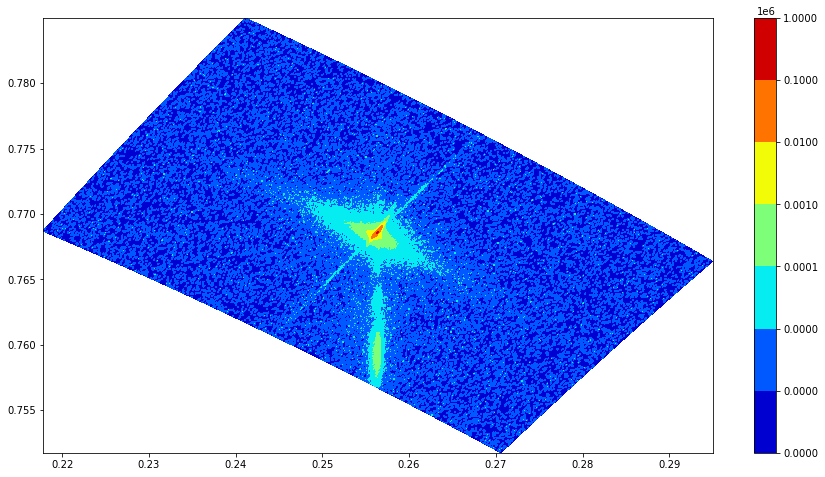

In [11]:
file = './xrd/YG031-SRO001-STO001-RSM-06122022.xrdml'
curve_shape = xu.io.getxrdml_scan(file)[0].shape
omega, two_theta, intensity = xu.io.panalytical_xml.getxrdml_map(file)

omega = omega.reshape(curve_shape)
two_theta = two_theta.reshape(curve_shape)
intensity = intensity.reshape(curve_shape)
intensity[intensity==0]=1

wavelength = 1.54
Qy = 1/wavelength*(np.sin(np.deg2rad(two_theta-omega))+np.sin(np.deg2rad(omega)))
Qx = 1/wavelength*(np.cos(np.deg2rad(omega))-np.cos(np.deg2rad(two_theta-omega)))

%matplotlib inline
plt.figure(figsize=(15, 8))
plt.contourf(Qx, Qy, intensity, levels=100, locator=ticker.LogLocator(), cmap=cm.jet)
# plt.contour(x, y, z, levels=100, cmap=cm.jet)
plt.colorbar()
plt.show()

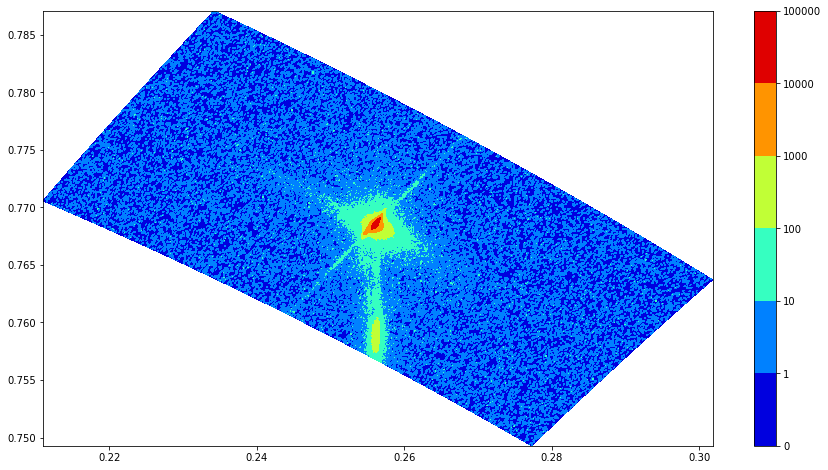

In [12]:
file = './xrd/YG032-SRO001-STO001-RSM-06122022.xrdml'
curve_shape = xu.io.getxrdml_scan(file)[0].shape
omega, two_theta, intensity = xu.io.panalytical_xml.getxrdml_map(file)

omega = omega.reshape(curve_shape)
two_theta = two_theta.reshape(curve_shape)
intensity = intensity.reshape(curve_shape)
intensity[intensity==0]=1

wavelength = 1.54
Qy = 1/wavelength*(np.sin(np.deg2rad(two_theta-omega))+np.sin(np.deg2rad(omega)))
Qx = 1/wavelength*(np.cos(np.deg2rad(omega))-np.cos(np.deg2rad(two_theta-omega)))

%matplotlib inline
plt.figure(figsize=(15, 8))
plt.contourf(Qx, Qy, intensity, levels=100, locator=ticker.LogLocator(), cmap=cm.jet)
# plt.contour(x, y, z, levels=100, cmap=cm.jet)
plt.colorbar()
plt.show()

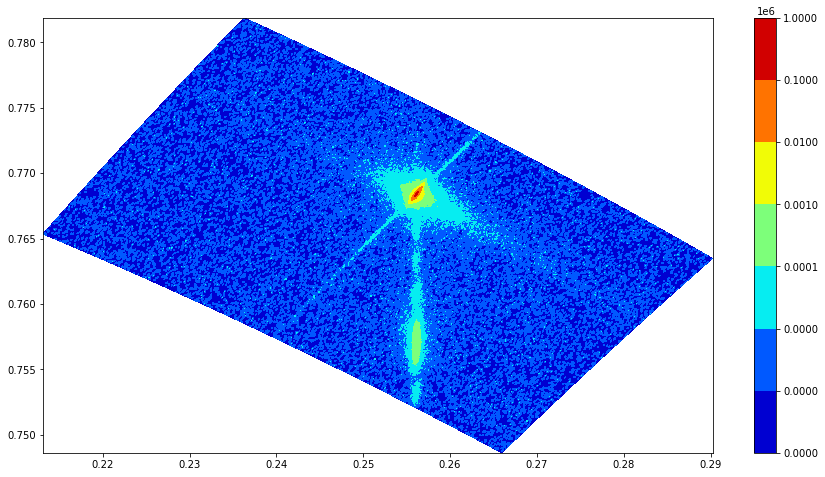

In [13]:
file = './xrd/YG033-SRO001-STO001-RSM-06122022.xrdml'
curve_shape = xu.io.getxrdml_scan(file)[0].shape
omega, two_theta, intensity = xu.io.panalytical_xml.getxrdml_map(file)

omega = omega.reshape(curve_shape)
two_theta = two_theta.reshape(curve_shape)
intensity = intensity.reshape(curve_shape)
intensity[intensity==0]=1

wavelength = 1.54
Qy = 1/wavelength*(np.sin(np.deg2rad(two_theta-omega))+np.sin(np.deg2rad(omega)))
Qx = 1/wavelength*(np.cos(np.deg2rad(omega))-np.cos(np.deg2rad(two_theta-omega)))

%matplotlib inline
plt.figure(figsize=(15, 8))
plt.contourf(Qx, Qy, intensity, levels=100, locator=ticker.LogLocator(), cmap=cm.jet)
# plt.contour(x, y, z, levels=100, cmap=cm.jet)
plt.colorbar()
plt.show()

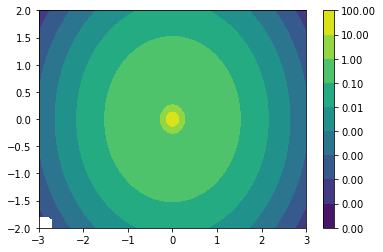

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import ticker, cm

N = 100
x = np.linspace(-3.0, 3.0, N)
y = np.linspace(-2.0, 2.0, N)

X, Y = np.meshgrid(x, y)

# A low hump with a spike coming out.
# Needs to have z/colour axis on a log scale so we see both hump and spike.
# linear scale only shows the spike.
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X * 10)**2 - (Y * 10)**2)
z = Z1 + 50 * Z2

# Put in some negative values (lower left corner) to cause trouble with logs:
z[:5, :5] = -1

# The following is not strictly essential, but it will eliminate
# a warning.  Comment it out to see the warning.
z = ma.masked_where(z <= 0, z)


# Automatic selection of levels works; setting the
# log locator tells contourf to use a log scale:
fig, ax = plt.subplots()
# cs = ax.contourf(X, Y, z, locator=ticker.LogLocator(), cmap=cm.PuBu_r)

# Alternatively, you can manually set the levels
# and the norm:
lev_exp = np.arange(np.floor(np.log10(z.min())-1),
                   np.ceil(np.log10(z.max())+1))
levs = np.power(10, lev_exp)
cs = ax.contourf(X, Y, z, levs, norm=colors.LogNorm())

cbar = fig.colorbar(cs)

plt.show()

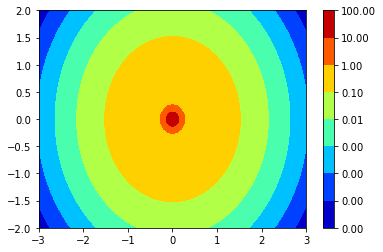

In [6]:
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
import numpy as np

x = np.linspace(-3.0, 3.0, 100)
y = np.linspace(-2.0, 2.0, 100)
X, Y = np.meshgrid(x, y)

Z1 = np.exp(-(X)**2 - (Y)**2)
Z2 = np.exp(-(X * 10)**2 - (Y * 10)**2)
z = Z1 + 50 * Z2

fig, ax = plt.subplots()

n_levels = 50
cs = ax.contourf(X, Y, z, n_levels,
                 locator=ticker.LogLocator(), 
                 cmap=cm.jet
                 )

cbar = fig.colorbar(cs)

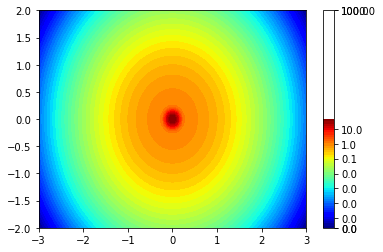

In [9]:
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
import numpy as np

x = np.linspace(-3.0, 3.0, 100)
y = np.linspace(-2.0, 2.0, 100)
X, Y = np.meshgrid(x, y)

Z1 = np.exp(-(X)**2 - (Y)**2)
Z2 = np.exp(-(X * 10)**2 - (Y * 10)**2)
z = Z1 + 50 * Z2

fig, ax = plt.subplots()

n_levels = 50
cs = ax.contourf(X, Y, z,
                 np.logspace(np.log10(z.min()),np.log10(z.max()), n_levels), 
                 locator=ticker.LogLocator(), 
                 cmap=cm.jet
                 )

cbar = fig.colorbar(cs)
cbar.locator = ticker.LogLocator(10)
cbar.set_ticks(cbar.locator.tick_values(z.min(), z.max()))
cbar.minorticks_off()
plt.show()

In [12]:
import numpy as np
import glob
import xrayutilities as xu
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib import ticker, cm, colors

def plot_rsm(file):
    curve_shape = xu.io.getxrdml_scan(file)[0].shape
    omega, two_theta, intensity = xu.io.panalytical_xml.getxrdml_map(file)

    omega = omega.reshape(curve_shape)
    two_theta = two_theta.reshape(curve_shape)
    intensity = intensity.reshape(curve_shape)
    intensity[intensity==0]=1
    
    wavelength = 1.54
    Qy = 1/wavelength*(np.sin(np.deg2rad(two_theta-omega))+np.sin(np.deg2rad(omega))) + 3.905/3
    Qx = 1/wavelength*(np.cos(np.deg2rad(omega))-np.cos(np.deg2rad(two_theta-omega)))

    n_levels = 50
    fig, ax = plt.subplots(figsize=(15, 8))
    cs = ax.contourf(Qx, Qy, intensity, n_levels,
                     locator=ticker.LogLocator(), cmap=cm.viridis, norm=colors.LogNorm())
    cbar = fig.colorbar(cs)
    plt.show()

In [16]:
3.905/3

1.3016666666666665

In [17]:
file  = './xrd/set_3/YG035-SRO001-STO001-RSM-06152022.xrdml'


In [44]:
Qx

array([[0.26582181, 0.26591605, 0.2660103 , ..., 0.28989323, 0.28999001,
        0.29008681],
       [0.26575747, 0.2658517 , 0.26594595, ..., 0.28982762, 0.2899244 ,
        0.29002119],
       [0.26569312, 0.26578735, 0.26588159, ..., 0.28976201, 0.28985878,
        0.28995557],
       ...,
       [0.21336789, 0.21345771, 0.21354754, ..., 0.23636102, 0.23645366,
        0.23654632],
       [0.21330212, 0.21339193, 0.21348176, ..., 0.23629384, 0.23638648,
        0.23647913],
       [0.21323635, 0.21332616, 0.21341598, ..., 0.23622666, 0.2363193 ,
        0.23641195]])

In [45]:
Qy

array([[0.74868256, 0.74874313, 0.74880369, ..., 0.76342849, 0.76348491,
        0.76354131],
       [0.7487054 , 0.74876598, 0.74882655, ..., 0.7634534 , 0.76350982,
        0.76356624],
       [0.74872823, 0.74878883, 0.7488494 , ..., 0.7634783 , 0.76353474,
        0.76359116],
       ...,
       [0.76528488, 0.76535183, 0.76541877, ..., 0.78166144, 0.78172442,
        0.78178739],
       [0.76530322, 0.76537018, 0.76543712, ..., 0.78168175, 0.78174474,
        0.78180772],
       [0.76532154, 0.76538851, 0.76545546, ..., 0.78170205, 0.78176505,
        0.78182804]])

In [43]:
intensity

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [5.29100529, 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])

In [ ]:
xv, yv = np.meshgrid(x, y, indexing='ij')
for i in range(xv):
    for j in range(yv):
        
        

In [32]:
1/wavelength*(np.sin(np.deg2rad(46.4720-23.2360))+np.sin(np.deg2rad(23.2360)))

0.5123627812439361

In [38]:
1/wavelength*(np.cos(np.deg2rad(23.2360))-np.cos(np.deg2rad(46.4720-23.2360)))

0.0

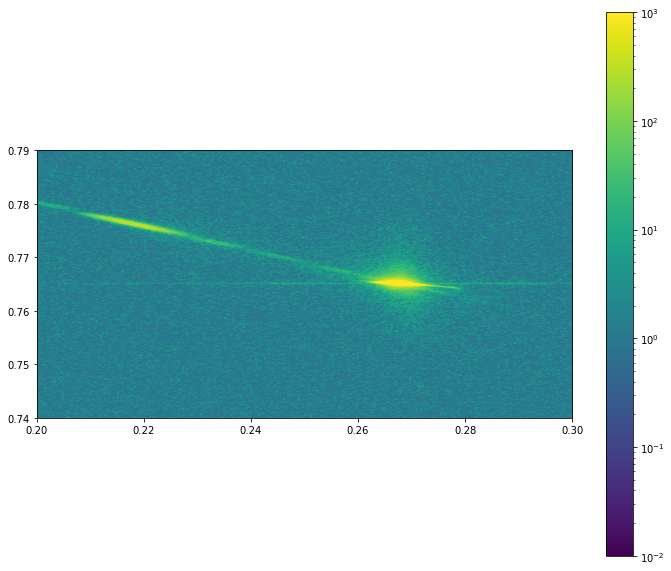

In [42]:
%matplotlib inline
curve_shape = xu.io.getxrdml_scan(file)[0].shape
omega, two_theta, intensity = xu.io.panalytical_xml.getxrdml_map(file)

omega = omega.reshape(curve_shape)
two_theta = two_theta.reshape(curve_shape)
intensity = intensity.reshape(curve_shape)
intensity[intensity==0]=1

wavelength = 1.54
Qy = 1/wavelength*(np.sin(np.deg2rad(two_theta-omega))+np.sin(np.deg2rad(omega)))
Qx = 1/wavelength*(np.cos(np.deg2rad(omega))-np.cos(np.deg2rad(two_theta-omega)))

n_levels = 50
fig, ax = plt.subplots(figsize=(12, 10))
cs = ax.imshow(intensity, norm=colors.LogNorm(vmin=0.01, vmax=1000),
               extent=[0.20, 0.30, 0.74, 0.79], clip_on=True)
cbar = fig.colorbar(cs)
plt.show()

In [ ]:
def do_plot(ax, Z, transform):
    im = ax.imshow(Z, interpolation='none',
                   origin='lower',
                   extent=[0.74, 0.79, 0.20, 0.30], clip_on=True)


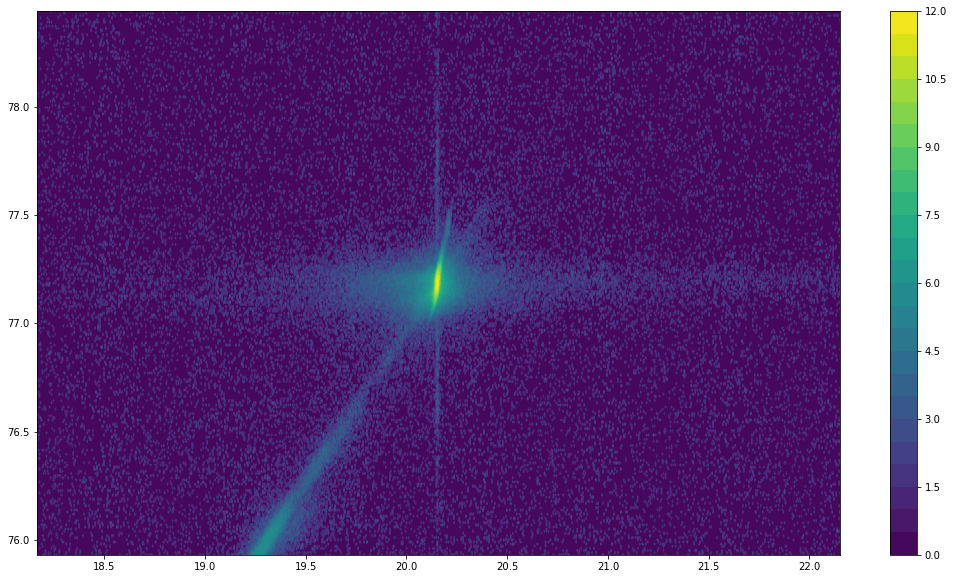

In [2]:
file = './xrd/YG028-SRO001-STO001-scan_2-RSM_1-06092022.xrdml'
curve_shape = xu.io.getxrdml_scan(file)[0].shape
omega, two_theta, intensity = xu.io.panalytical_xml.getxrdml_map(file)

omega = omega.reshape(curve_shape)
two_theta = two_theta.reshape(curve_shape)
intensity = intensity.reshape(curve_shape)
intensity[intensity==0]=1

# %matplotlib notebook
plt.figure(figsize=(18, 10))
plt.contourf(omega, two_theta, np.log(intensity), 
             #levels=[1e0, 1e1, 1e2, 1e3, 2e4, 4e4, 6e4, 8e4, 1e5, 1.2e5, 1.4e5, 1.6e5, 1.8e5, 2e5], 
             cmap=plt.cm.viridis, levels=25) #, norm=colors.LogNorm())
# plt.contour(x, y, z, levels=100, cmap=cm.jet)
plt.colorbar()
plt.show()

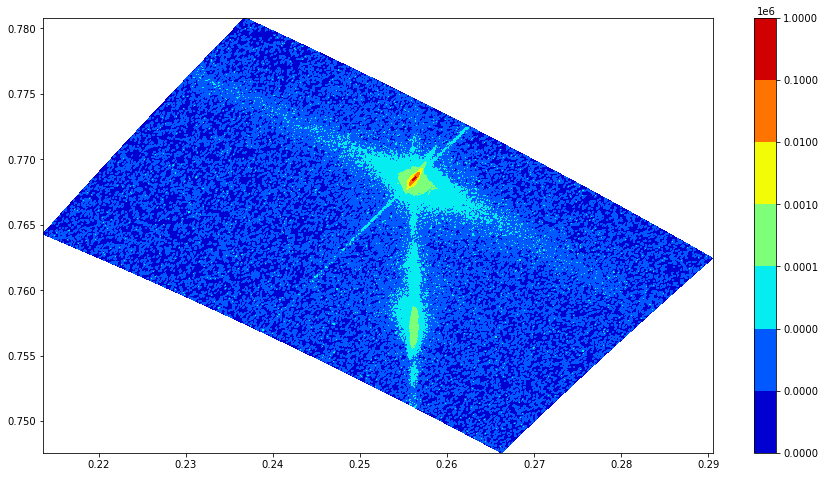

In [4]:
file = './xrd/YG028-SRO001-STO001-scan_2-RSM_3-06092022.xrdml'
curve_shape = xu.io.getxrdml_scan(file)[0].shape
omega, two_theta, intensity = xu.io.panalytical_xml.getxrdml_map(file)

omega = omega.reshape(curve_shape)
two_theta = two_theta.reshape(curve_shape)
intensity = intensity.reshape(curve_shape)
intensity[intensity==0]=1

wavelength = 1.54
Qy = 1/wavelength*(np.sin(np.deg2rad(two_theta-omega))+np.sin(np.deg2rad(omega)))
Qx = 1/wavelength*(np.cos(np.deg2rad(omega))-np.cos(np.deg2rad(two_theta-omega)))

%matplotlib inline
plt.figure(figsize=(15, 8))
plt.contourf(Qx, Qy, intensity, levels=100, locator=ticker.LogLocator(), cmap=cm.jet)
# plt.contour(x, y, z, levels=100, cmap=cm.jet)
plt.colorbar()
plt.show()

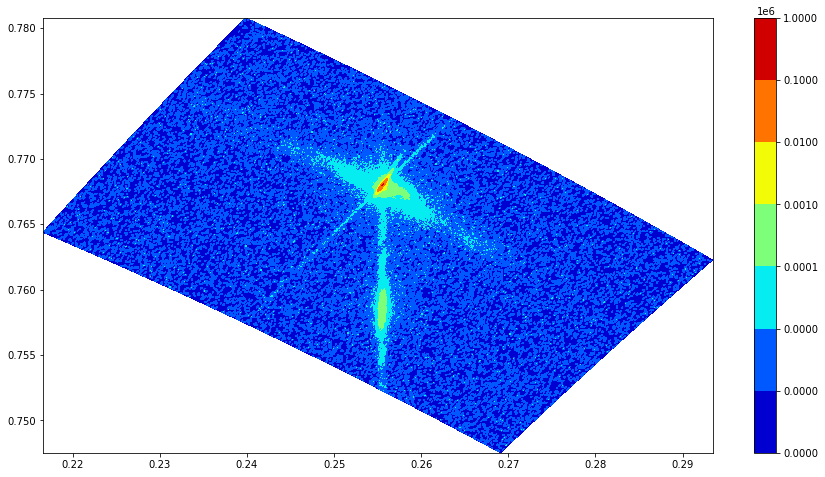

In [5]:
file = './xrd/YG029-SRO001-STO001-RSM-2-06052022.xrdml'
curve_shape = xu.io.getxrdml_scan(file)[0].shape
omega, two_theta, intensity = xu.io.panalytical_xml.getxrdml_map(file)

omega = omega.reshape(curve_shape)
two_theta = two_theta.reshape(curve_shape)
intensity = intensity.reshape(curve_shape)
intensity[intensity==0]=1

wavelength = 1.54
Qy = 1/wavelength*(np.sin(np.deg2rad(two_theta-omega))+np.sin(np.deg2rad(omega)))
Qx = 1/wavelength*(np.cos(np.deg2rad(omega))-np.cos(np.deg2rad(two_theta-omega)))

%matplotlib inline
plt.figure(figsize=(15, 8))
plt.contourf(Qx, Qy, intensity, levels=100, locator=ticker.LogLocator(), cmap=cm.jet)
# plt.contour(x, y, z, levels=100, cmap=cm.jet)
plt.colorbar()
plt.show()

In [3]:
file = './xrd/YG029-SRO001-STO001-RSM-2-06052022.xrdml'

omega, two_theta, intensity = xu.io.panalytical_xml.getxrdml_map(file)

omega = omega.reshape(809, 255)
two_theta = two_theta.reshape(809, 255)
intensity = intensity.reshape(809, 255)
intensity[intensity==0]=1

In [4]:
np.where(omega<0), np.where(two_theta<0), np.where(intensity<0)

((array([], dtype=int64), array([], dtype=int64)),
 (array([], dtype=int64), array([], dtype=int64)),
 (array([], dtype=int64), array([], dtype=int64)))

In [35]:
# intensity[intensity<10]=0

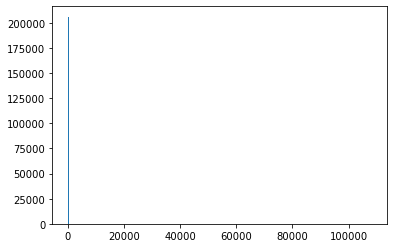

In [36]:
h = plt.hist(intensity.flatten(), bins=200)

In [70]:
np.min(np.log(intensity))

-inf

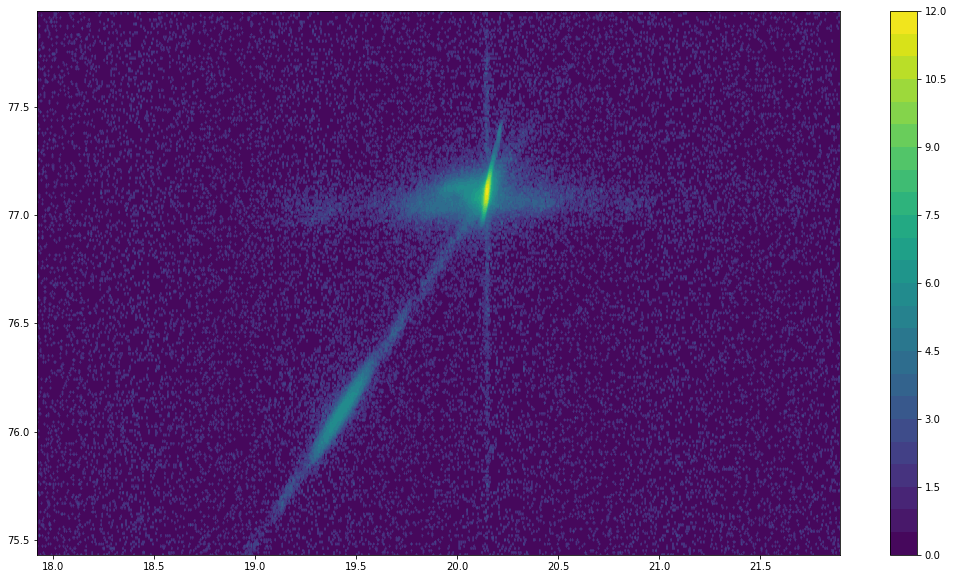

In [8]:
# %matplotlib notebook
plt.figure(figsize=(18, 10))
plt.contourf(omega, two_theta, np.log(intensity), 
             #levels=[1e0, 1e1, 1e2, 1e3, 2e4, 4e4, 6e4, 8e4, 1e5, 1.2e5, 1.4e5, 1.6e5, 1.8e5, 2e5], 
             cmap=plt.cm.viridis, levels=25) #, norm=colors.LogNorm())
# plt.contour(x, y, z, levels=100, cmap=cm.jet)
plt.colorbar()
plt.show()

In [ ]:
levels=[1e-3, 1e-2, 1e-1, 1e0],

/tmp/ipykernel_2179/3708723935.py:3: UserWarning: Log scale: values of z <= 0 have been masked
  plt.contourf(omega, two_theta, intensity, levels=10, locator=ticker.LogLocator(), cmap=cm.jet)


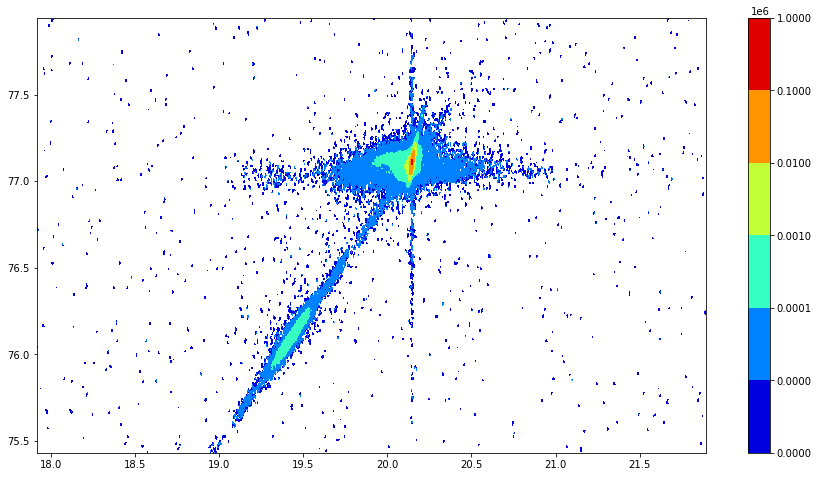

In [51]:
# %matplotlib notebook
plt.figure(figsize=(15, 8))
plt.contourf(omega, two_theta, intensity, levels=10, locator=ticker.LogLocator(), cmap=cm.jet)
# plt.contour(x, y, z, levels=100, cmap=cm.jet)
plt.colorbar()
plt.show()

In [ ]:
wavelength = 1.54
Qy = 1/wavelength*(np.sin(np.deg2rad(two_theta-omega))+np.sin(np.deg2rad(omega)))
Qx = 1/wavelength*(np.cos(np.deg2rad(omega))-np.cos(np.deg2rad(two_theta-omega)))

%matplotlib inline
plt.figure(figsize=(15, 8))
plt.contourf(Qx, Qy, intensity, levels=100, locator=ticker.LogLocator(), cmap=cm.jet)
# plt.contour(x, y, z, levels=100, cmap=cm.jet)
plt.colorbar()
plt.show()

In [13]:
wavelength = 1.54
Qy = 1/wavelength*(np.sin(np.deg2rad(two_theta-omega))+np.sin(np.deg2rad(omega)))
Qx = 1/wavelength*(np.cos(np.deg2rad(omega))-np.cos(np.deg2rad(two_theta-omega)))

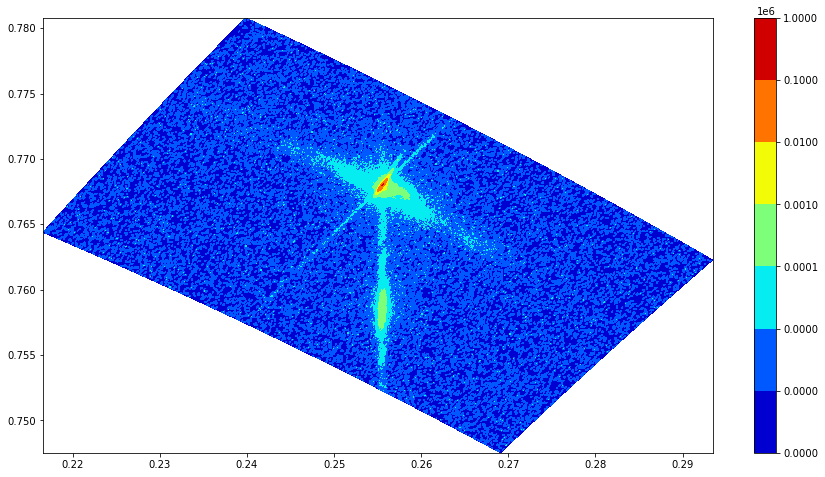

In [14]:
%matplotlib inline
plt.figure(figsize=(15, 8))
plt.contourf(Qx, Qy, intensity, levels=100, locator=ticker.LogLocator(), cmap=cm.jet)
# plt.contour(x, y, z, levels=100, cmap=cm.jet)
plt.colorbar()
plt.show()

In [77]:
x.shape, y.shape, x.shape

((206295,), (206295,), (206295,))

In [88]:
file = './xrd/YG029-SRO001-STO001-RSM-2-06052022.xrdml'
x, y = xu.io.getxrdml_scan(file)

In [89]:
x.shape, y.shape

((809, 255), (809, 255))

In [90]:
x

array([[75.43141764, 75.44130254, 75.45118744, ..., 77.92241256,
        77.93229746, 77.94218236],
       [75.43141764, 75.44130254, 75.45118744, ..., 77.92241256,
        77.93229746, 77.94218236],
       [75.43141764, 75.44130254, 75.45118744, ..., 77.92241256,
        77.93229746, 77.94218236],
       ...,
       [75.43141764, 75.44130254, 75.45118744, ..., 77.92241256,
        77.93229746, 77.94218236],
       [75.43141764, 75.44130254, 75.45118744, ..., 77.92241256,
        77.93229746, 77.94218236],
       [75.43141764, 75.44130254, 75.45118744, ..., 77.92241256,
        77.93229746, 77.94218236]])

In [91]:
y

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 5.29100529, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 5.29100529, 5.29100529,
        0.        ],
       [0.        , 0.        , 5.29100529, ..., 0.        , 0.        ,
        0.        ]])

In [92]:
z

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 5.29100529, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 5.29100529, 5.29100529,
        0.        ],
       [0.        , 0.        , 5.29100529, ..., 0.        , 0.        ,
        0.        ]])

In [83]:
809*255

206295

TypeError: Input z must be 2D, not 1D

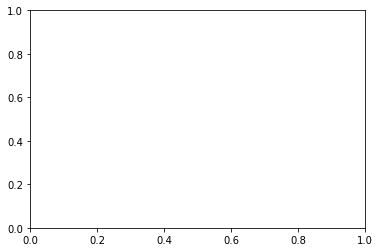

In [24]:
file = './xrd/YG029-SRO001-STO001-RSM-2-06052022.xrdml'
out = xu.io.getxrdml_scan(file)

In [59]:
out

[array([[75.43141764, 75.44130254, 75.45118744, ..., 77.92241256,
         77.93229746, 77.94218236],
        [75.43141764, 75.44130254, 75.45118744, ..., 77.92241256,
         77.93229746, 77.94218236],
        [75.43141764, 75.44130254, 75.45118744, ..., 77.92241256,
         77.93229746, 77.94218236],
        ...,
        [75.43141764, 75.44130254, 75.45118744, ..., 77.92241256,
         77.93229746, 77.94218236],
        [75.43141764, 75.44130254, 75.45118744, ..., 77.92241256,
         77.93229746, 77.94218236],
        [75.43141764, 75.44130254, 75.45118744, ..., 77.92241256,
         77.93229746, 77.94218236]]),
 array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 5.29100529, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        

In [55]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)

In [57]:
X

array([[0.        , 0.10204082, 0.20408163, ..., 4.79591837, 4.89795918,
        5.        ],
       [0.        , 0.10204082, 0.20408163, ..., 4.79591837, 4.89795918,
        5.        ],
       [0.        , 0.10204082, 0.20408163, ..., 4.79591837, 4.89795918,
        5.        ],
       ...,
       [0.        , 0.10204082, 0.20408163, ..., 4.79591837, 4.89795918,
        5.        ],
       [0.        , 0.10204082, 0.20408163, ..., 4.79591837, 4.89795918,
        5.        ],
       [0.        , 0.10204082, 0.20408163, ..., 4.79591837, 4.89795918,
        5.        ]])

In [58]:
Y

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.12820513, 0.12820513, 0.12820513, ..., 0.12820513, 0.12820513,
        0.12820513],
       [0.25641026, 0.25641026, 0.25641026, ..., 0.25641026, 0.25641026,
        0.25641026],
       ...,
       [4.74358974, 4.74358974, 4.74358974, ..., 4.74358974, 4.74358974,
        4.74358974],
       [4.87179487, 4.87179487, 4.87179487, ..., 4.87179487, 4.87179487,
        4.87179487],
       [5.        , 5.        , 5.        , ..., 5.        , 5.        ,
        5.        ]])

In [39]:
X.shape, Y.shape

((40, 50), (40, 50))

In [46]:
x = out[0]
y = out[1]

In [47]:
z = lambda x,y : np.exp(-x**2 - y**2)*0.12

In [52]:
y.max()

1.0830687830687831e+05

In [54]:
y.min()

0.0

/tmp/ipykernel_2162/289603726.py:1: UserWarning: No contour levels were found within the data range.
  plt.contour(x, y, z(x,y), levels=np.linspace(0,0.12,11))


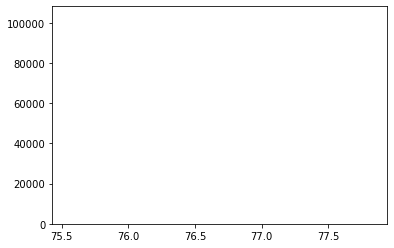

In [51]:
plt.contour(x, y, )

In [25]:
out[0].shape, out[1].shape

((809, 255), (809, 255))

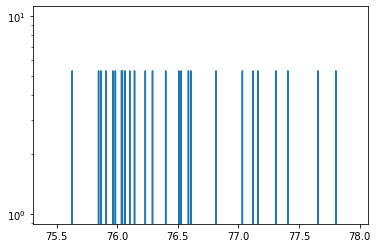

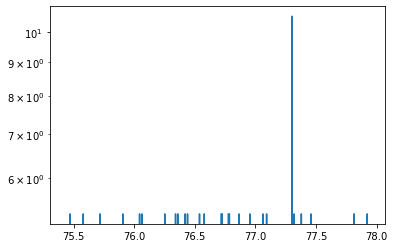

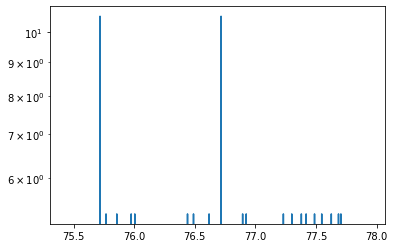

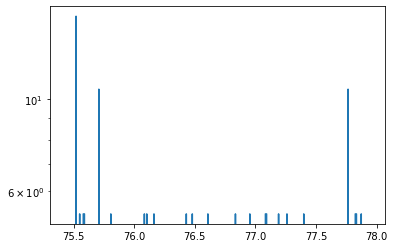

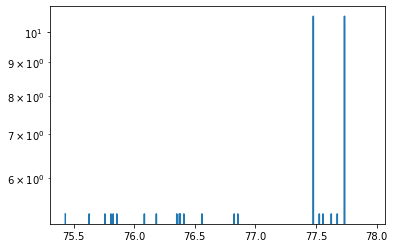

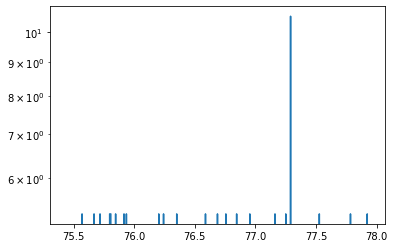

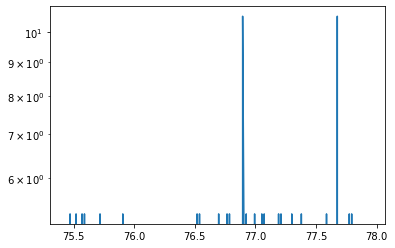

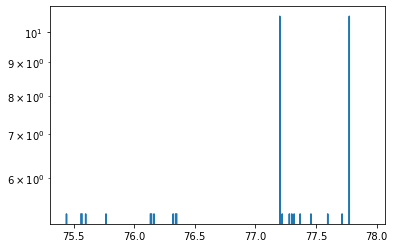

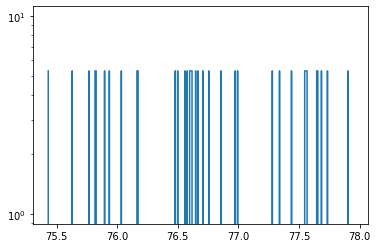

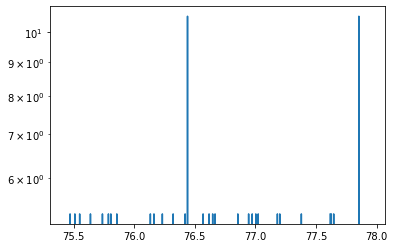

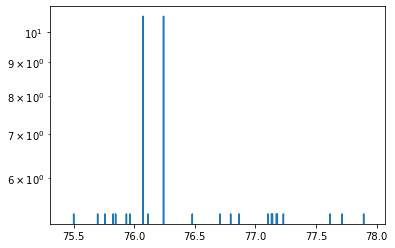

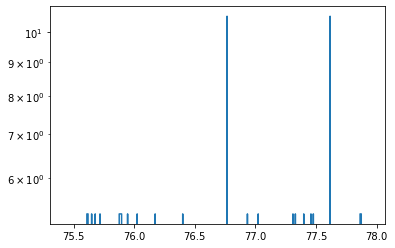

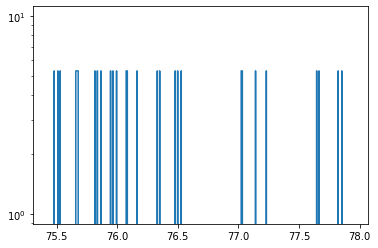

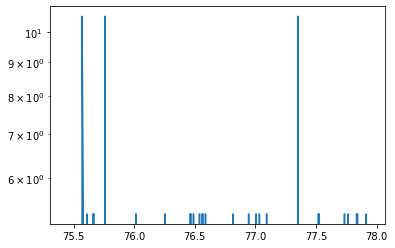

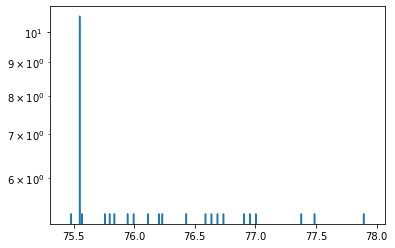

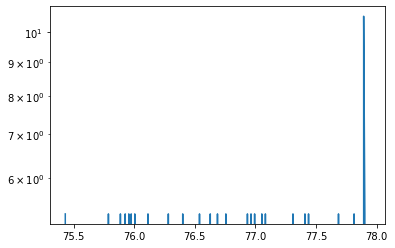

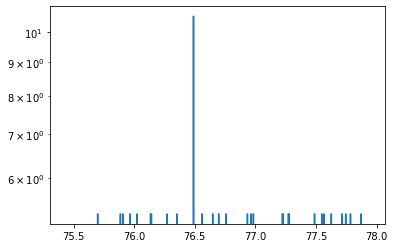

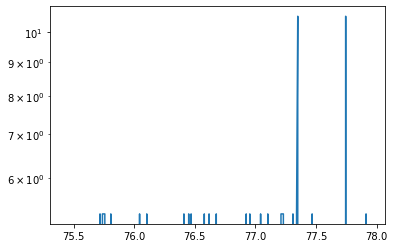

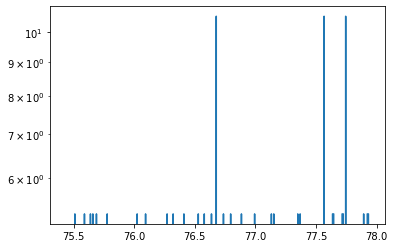

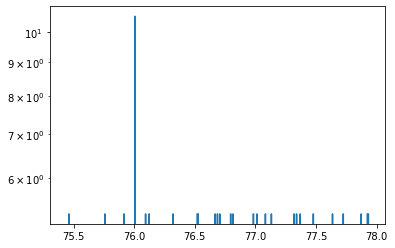

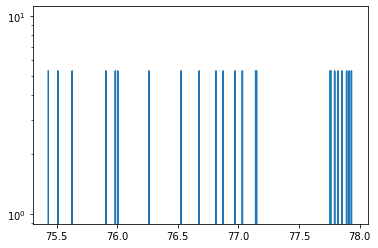

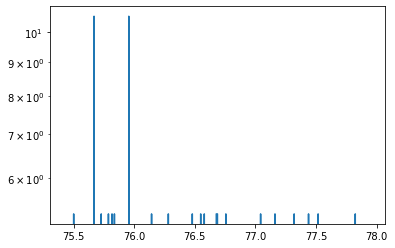

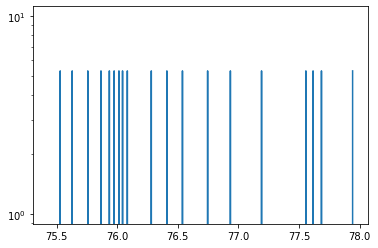

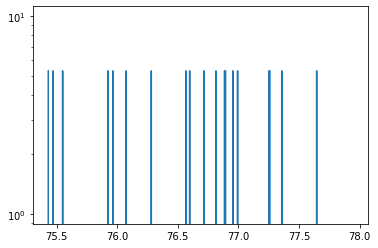

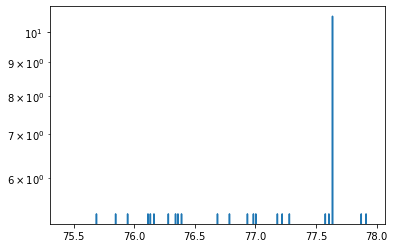

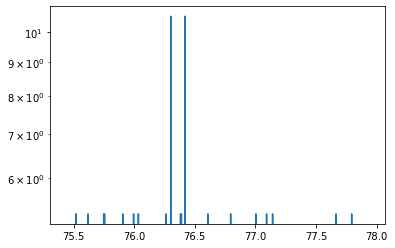

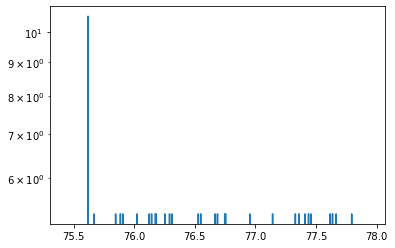

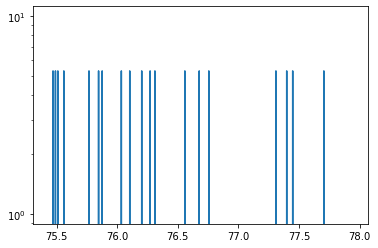

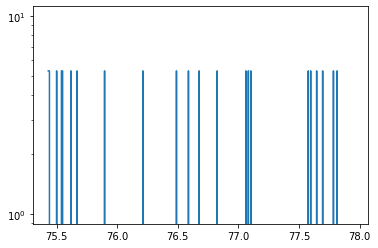

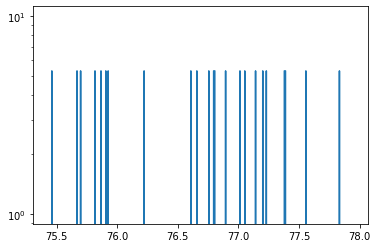

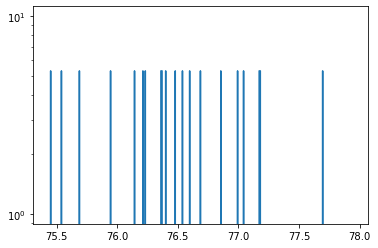

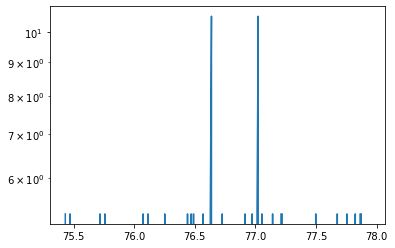

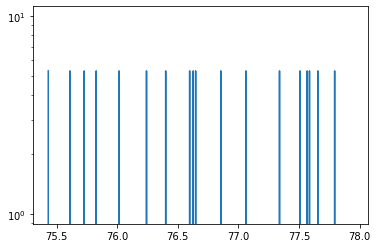

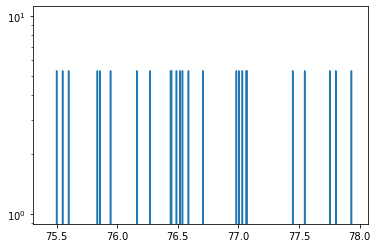

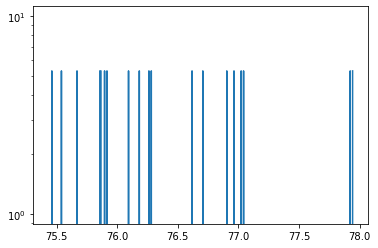

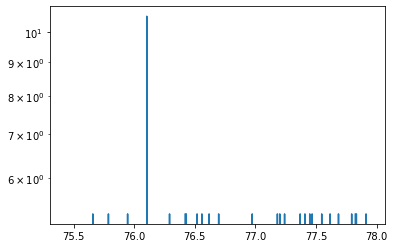

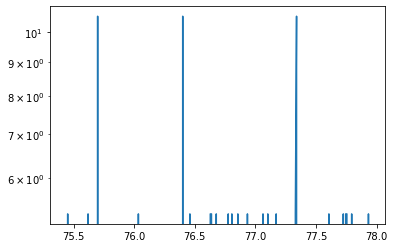

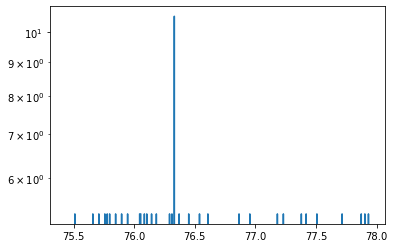

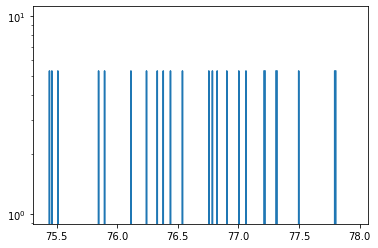

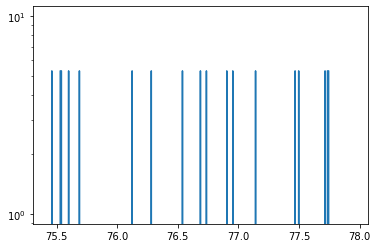

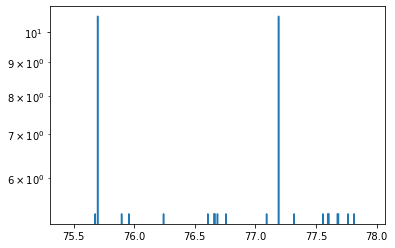

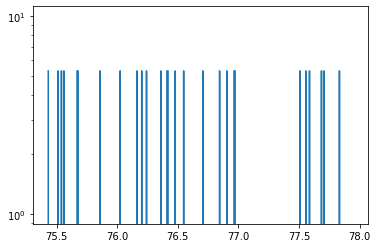

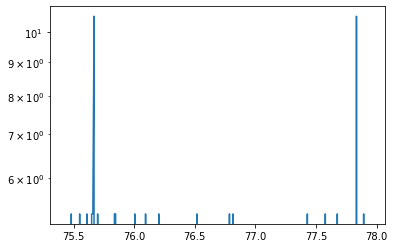

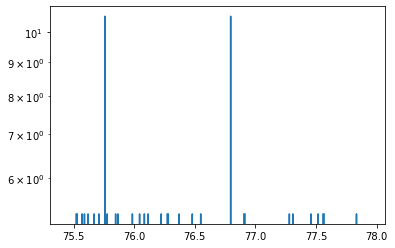

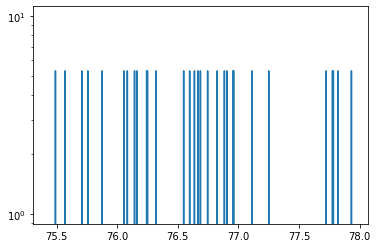

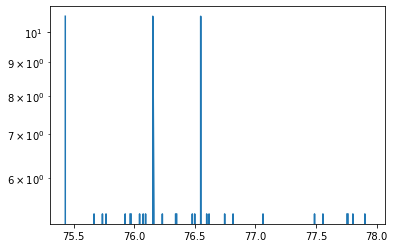

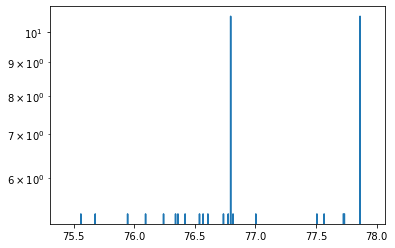

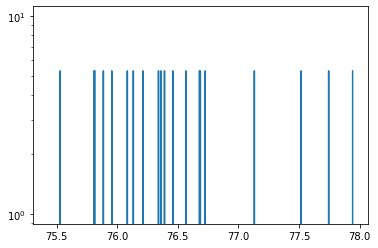

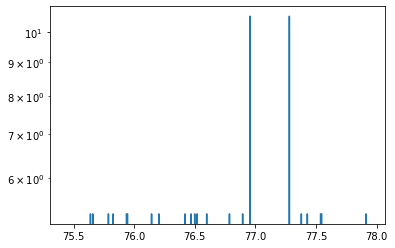

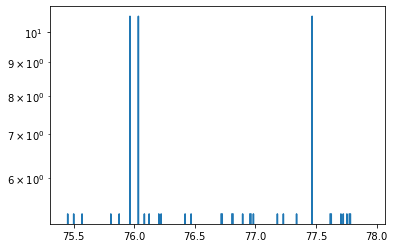

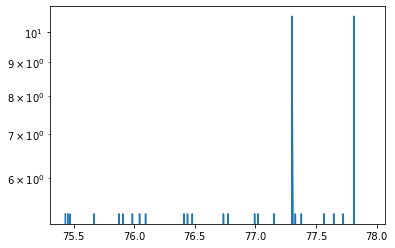

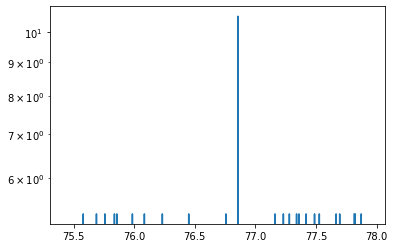

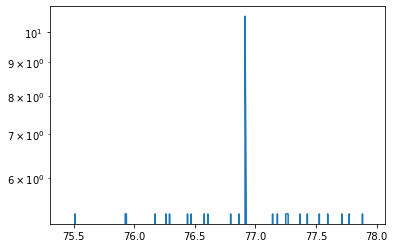

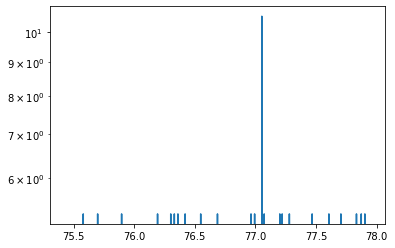

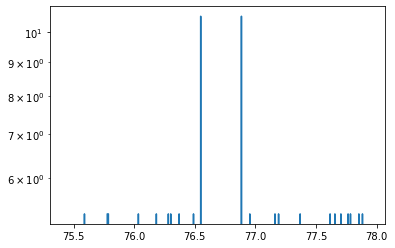

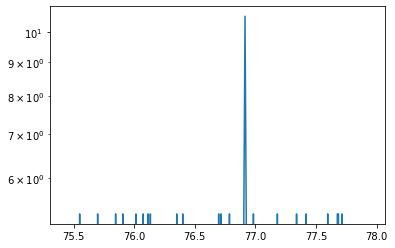

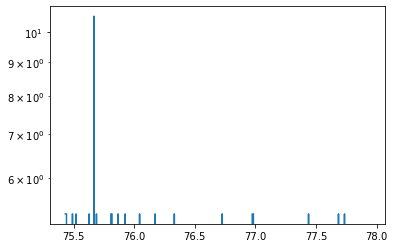

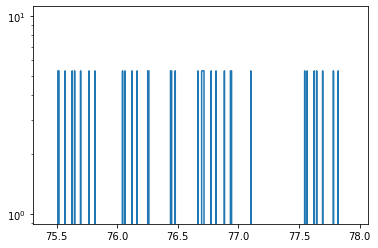

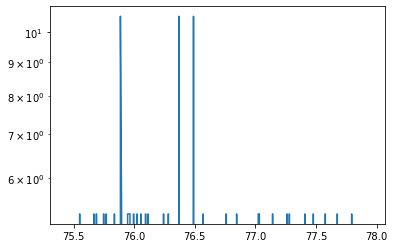

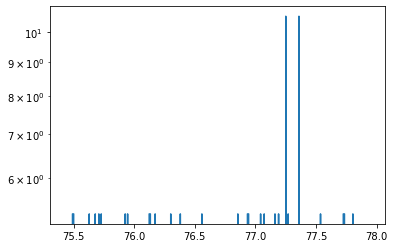

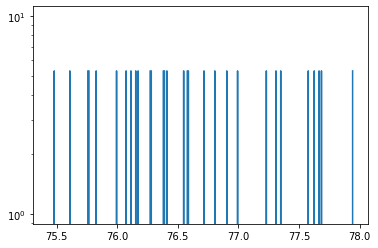

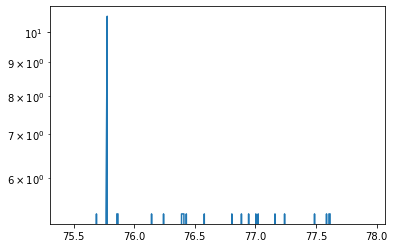

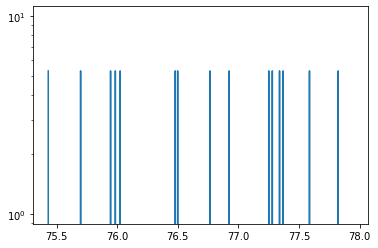

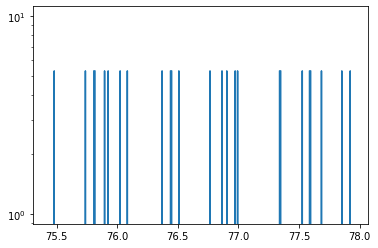

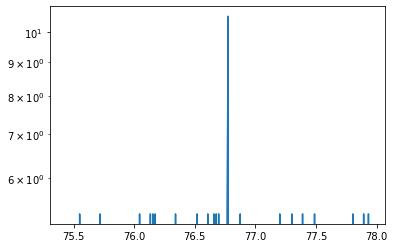

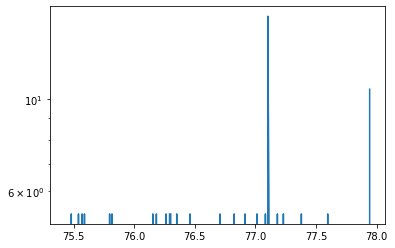

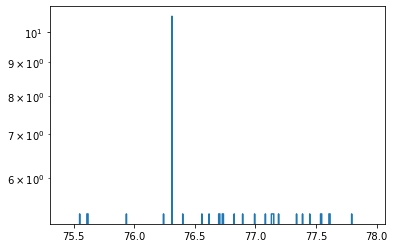

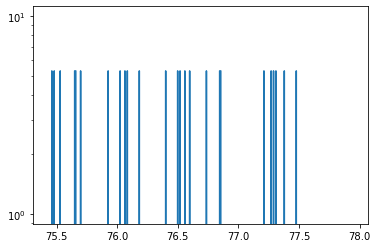

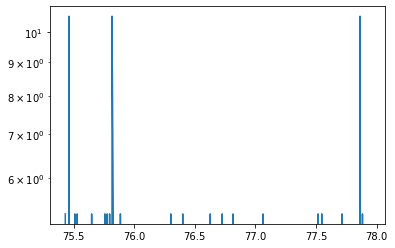

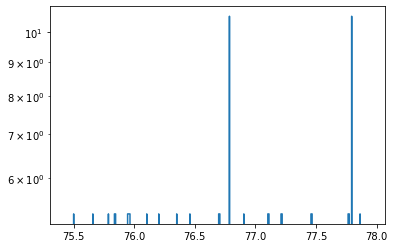

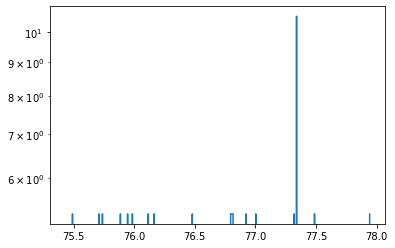

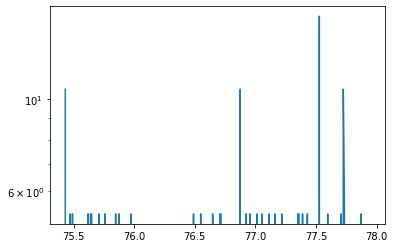

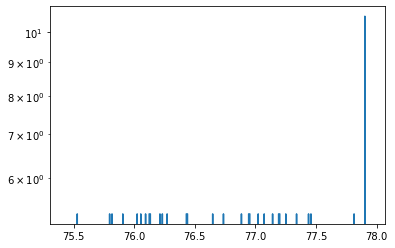

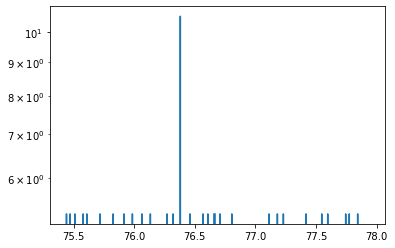

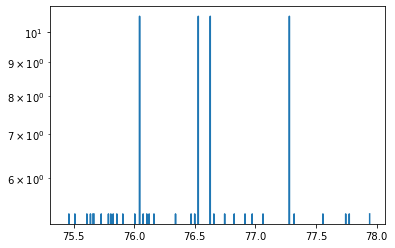

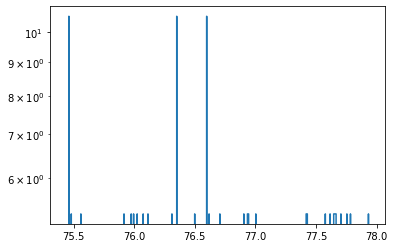

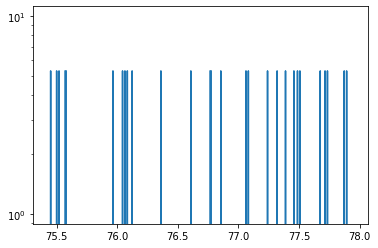

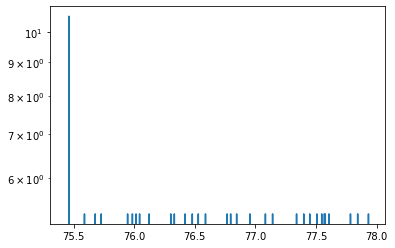

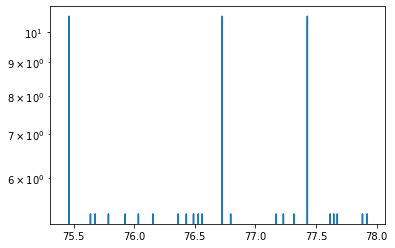

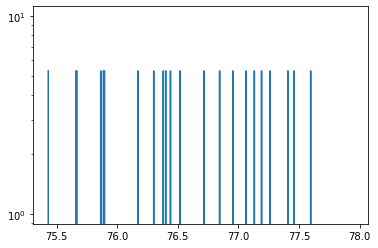

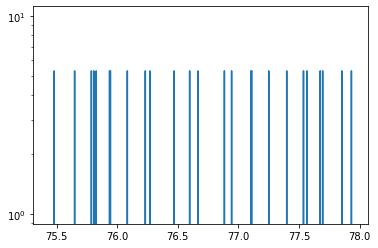

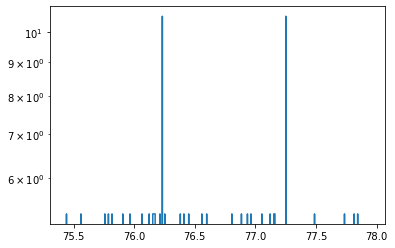

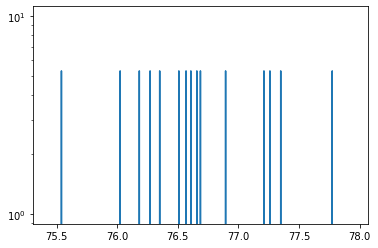

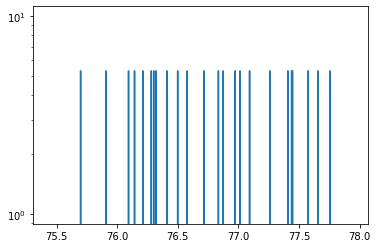

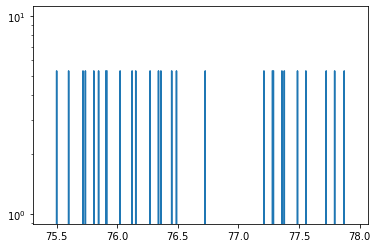

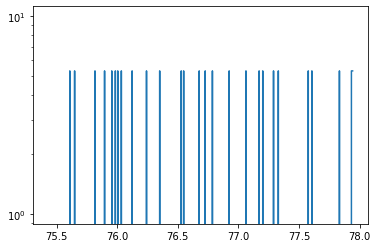

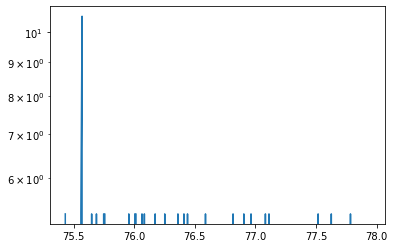

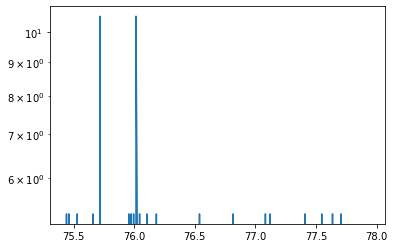

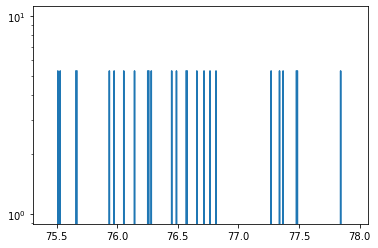

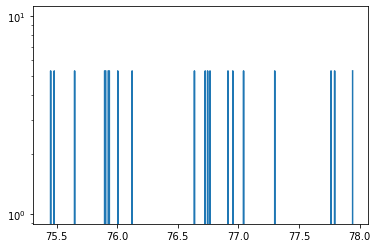

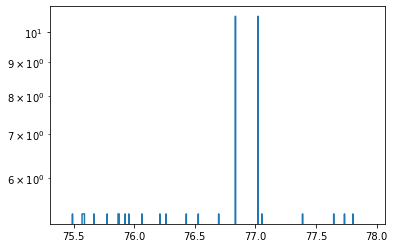

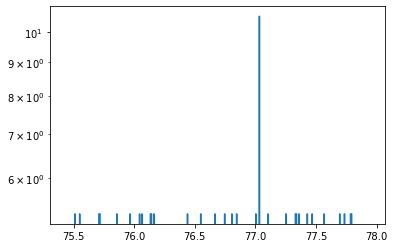

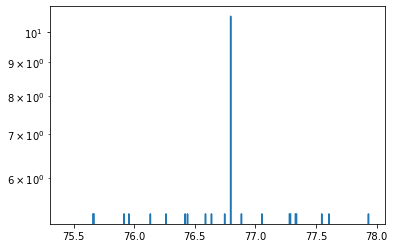

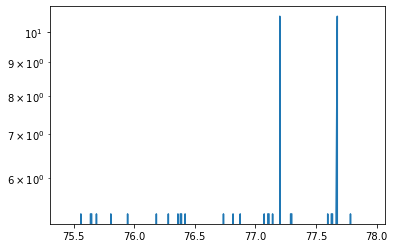

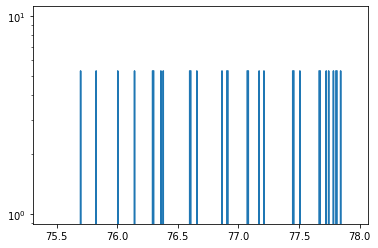

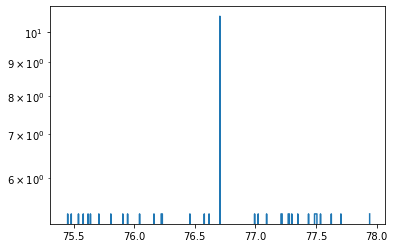

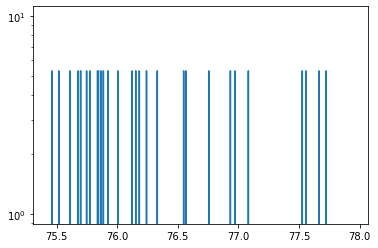

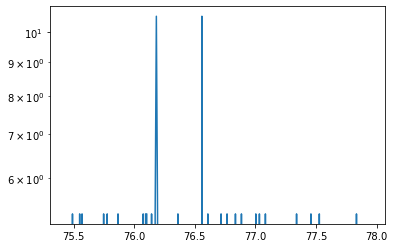

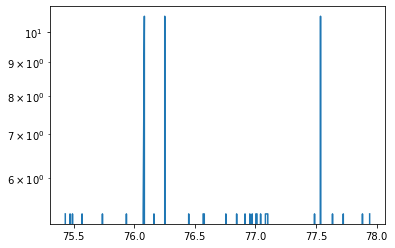

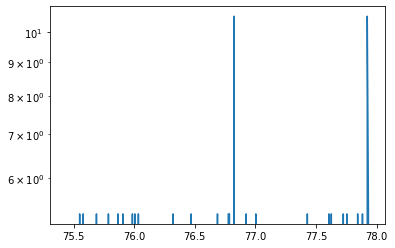

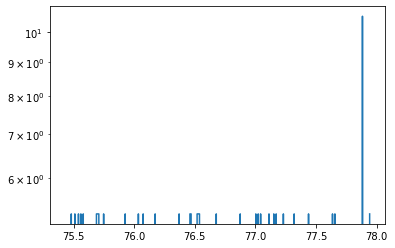

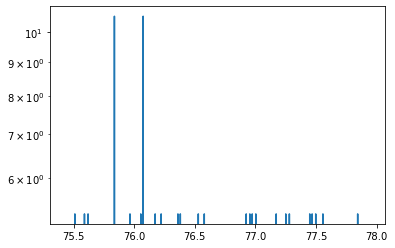

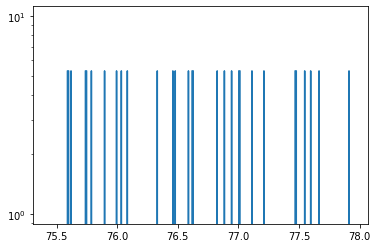

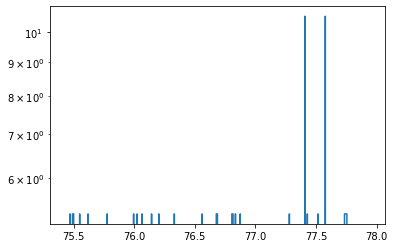

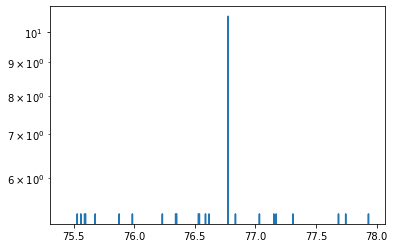

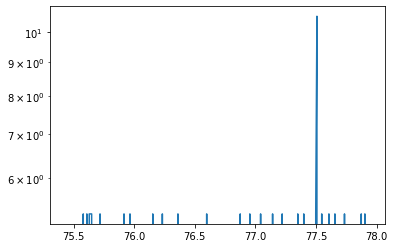

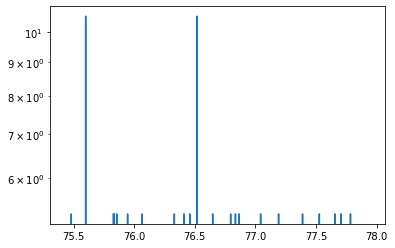

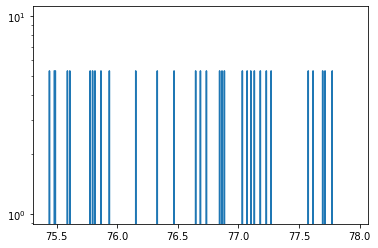

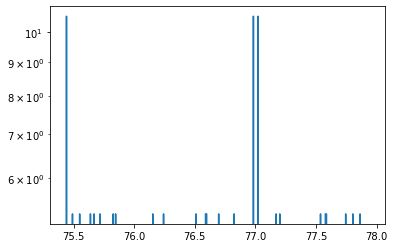

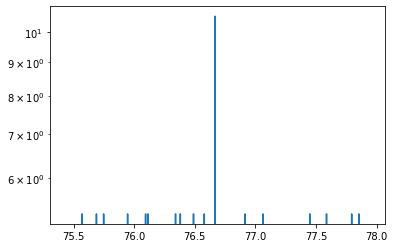

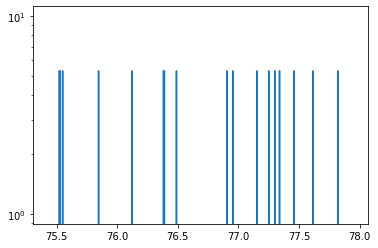

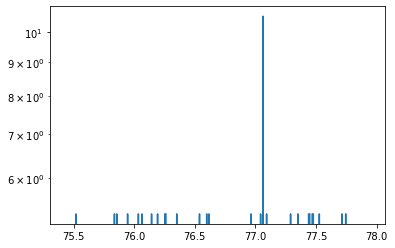

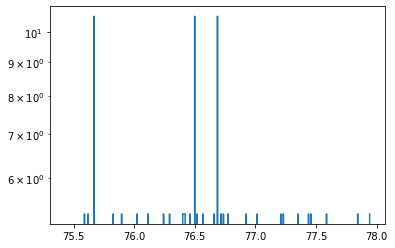

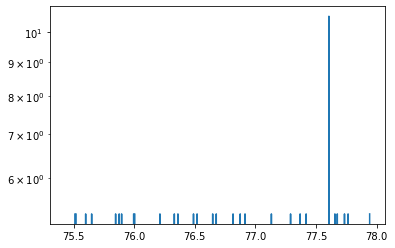

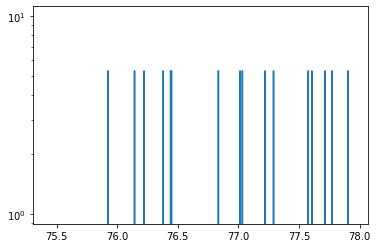

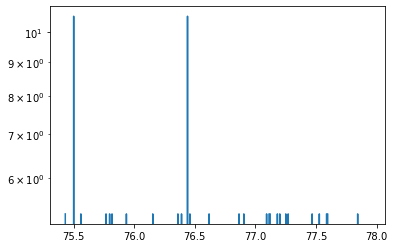

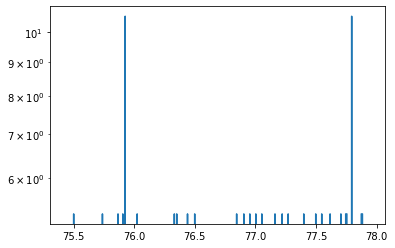

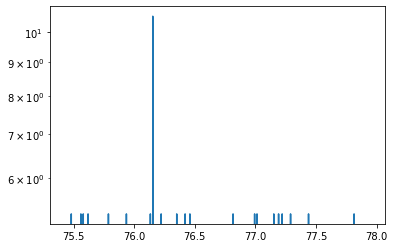

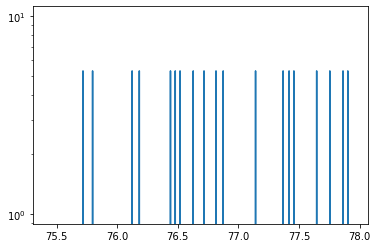

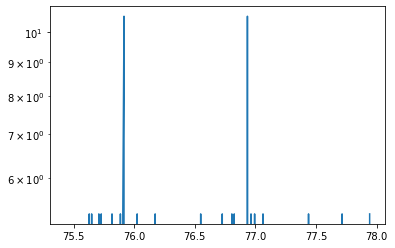

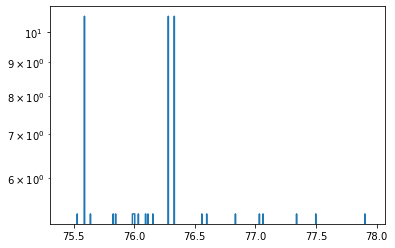

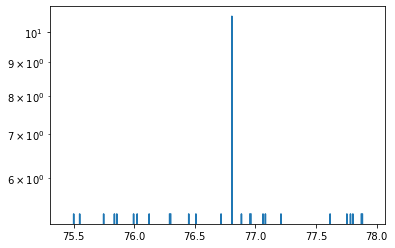

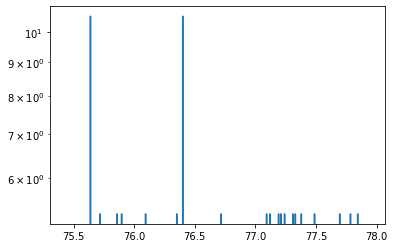

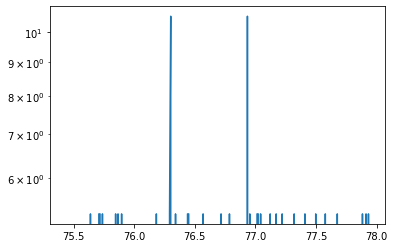

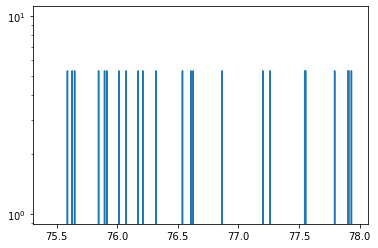

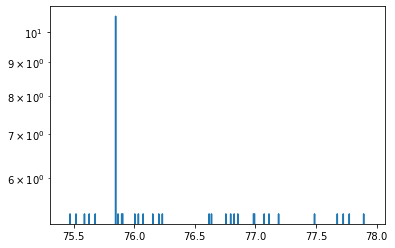

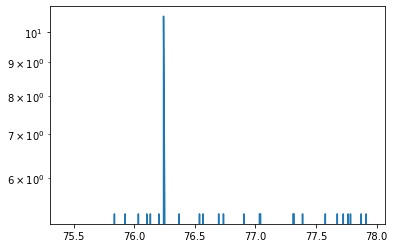

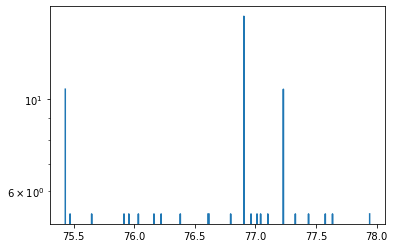

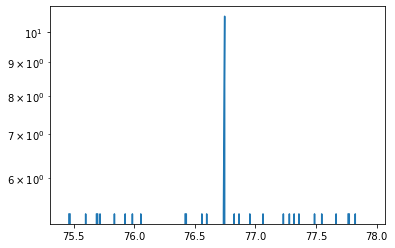

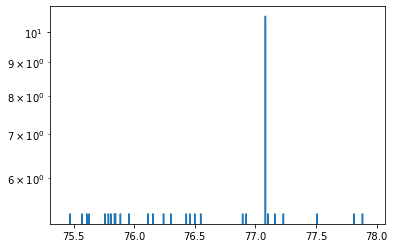

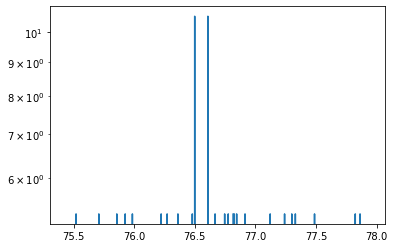

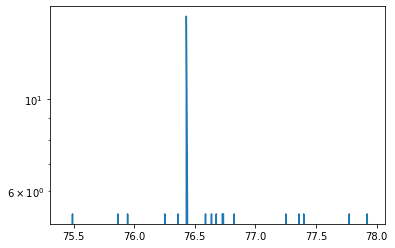

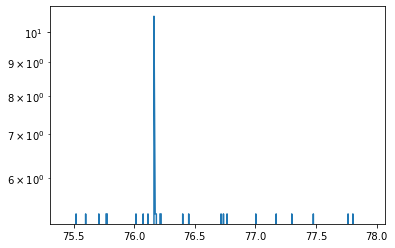

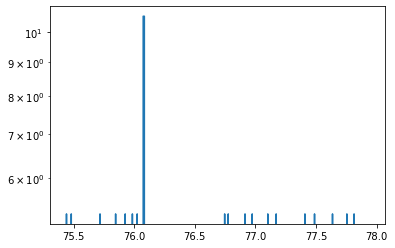

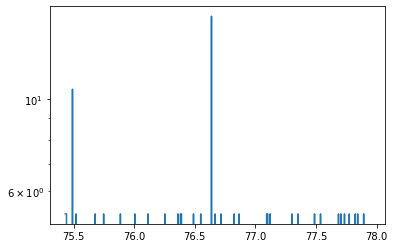

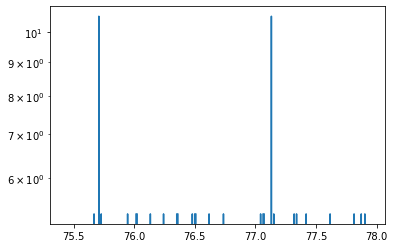

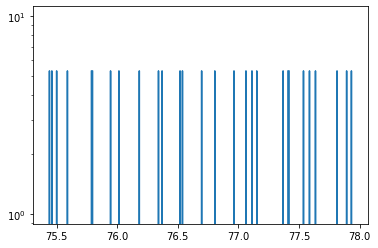

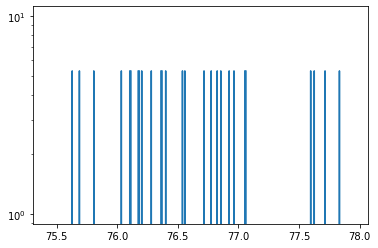

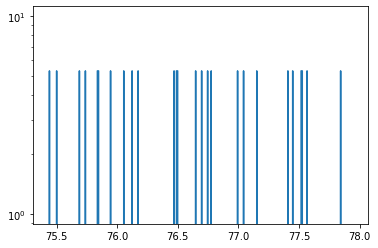

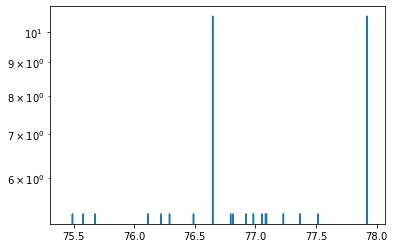

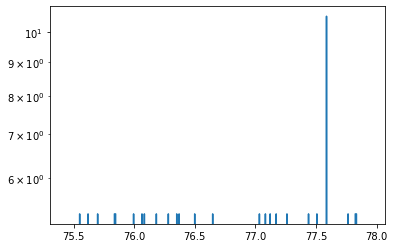

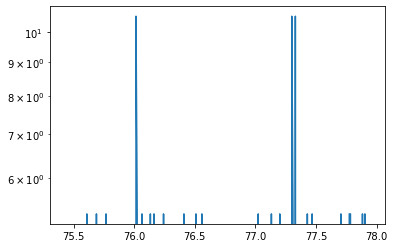

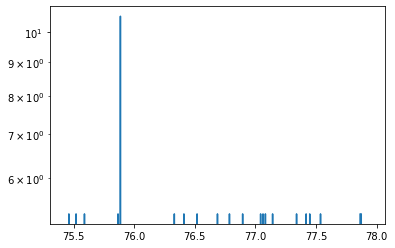

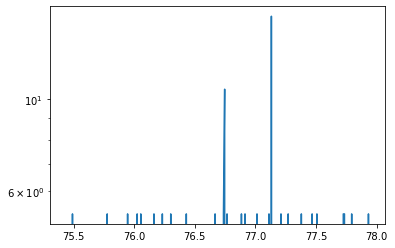

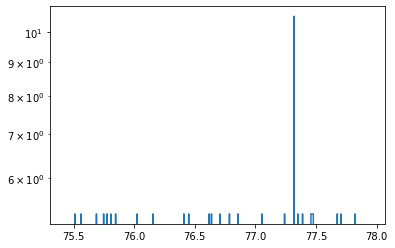

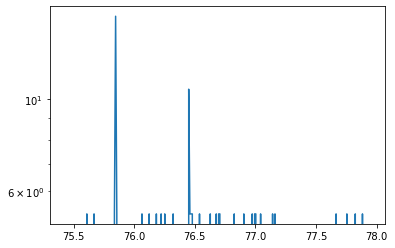

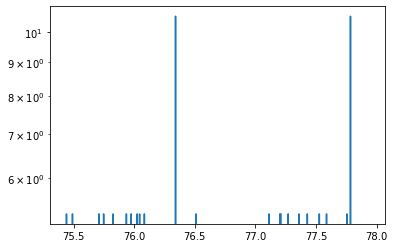

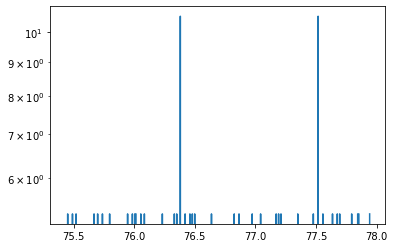

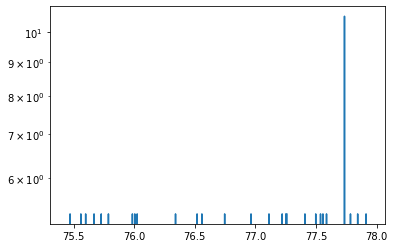

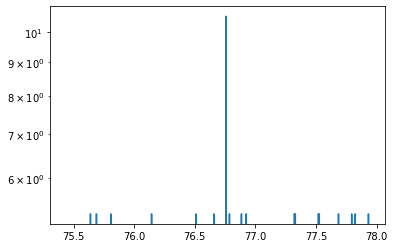

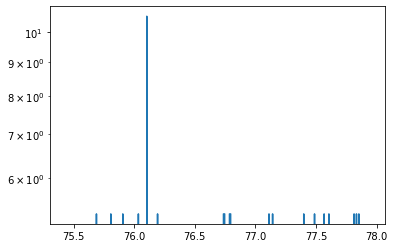

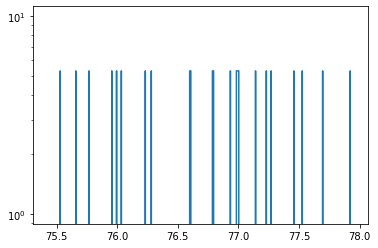

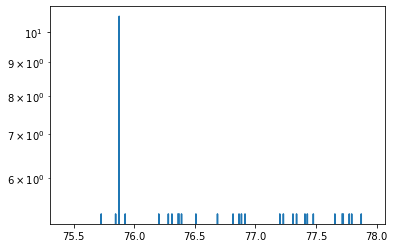

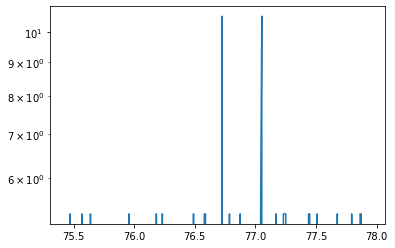

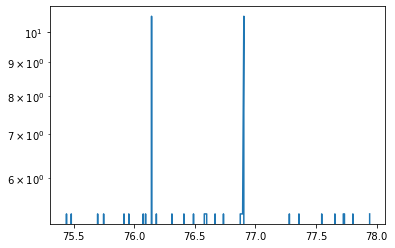

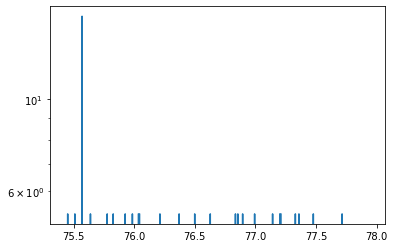

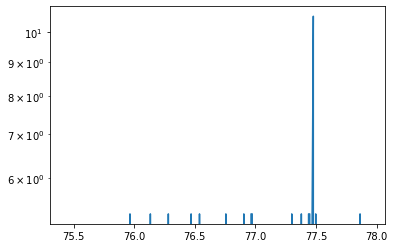

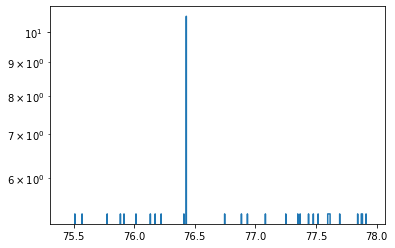

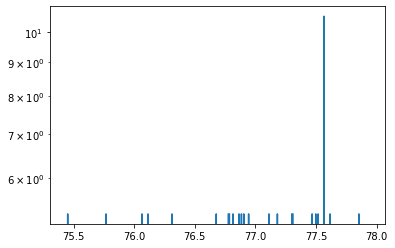

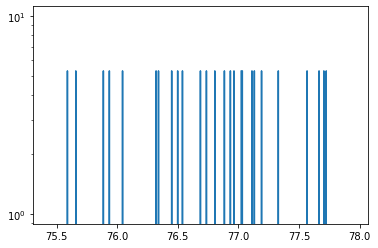

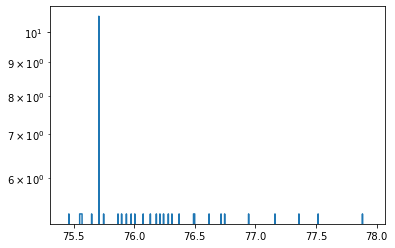

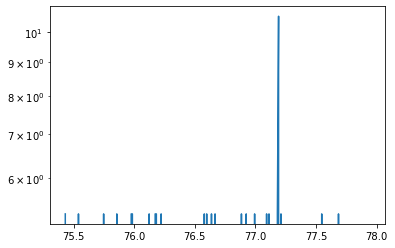

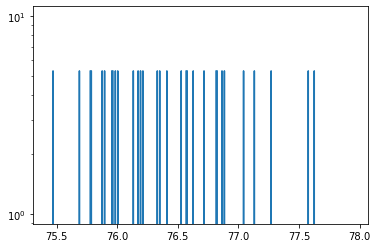

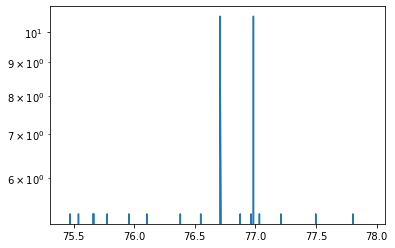

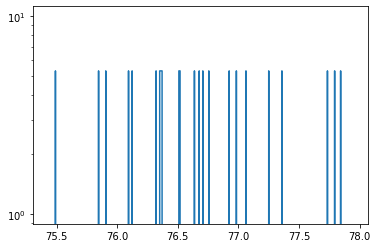

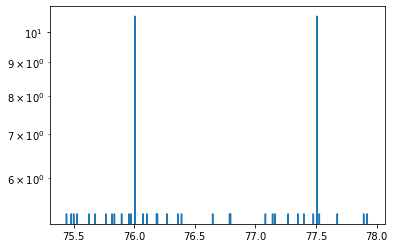

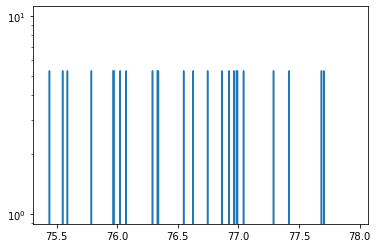

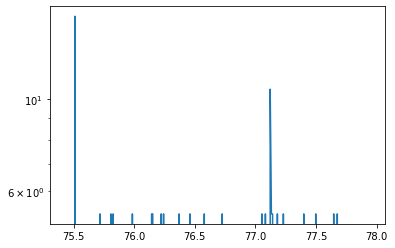

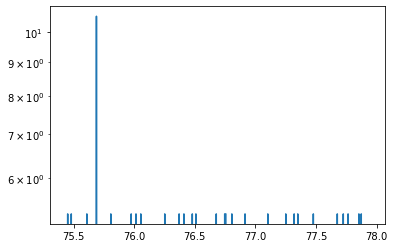

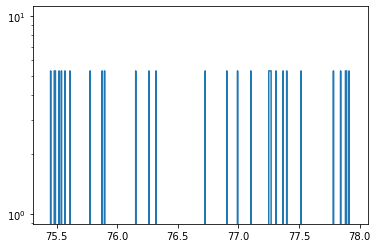

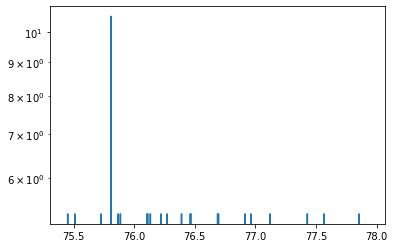

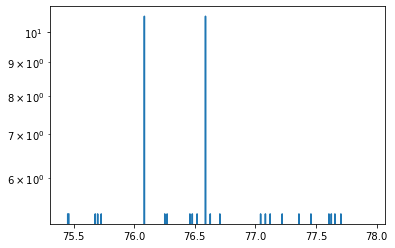

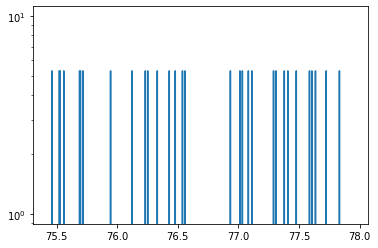

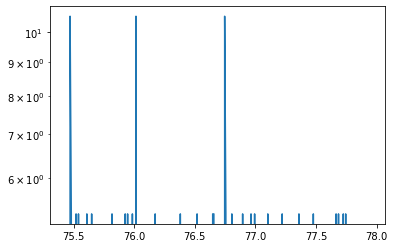

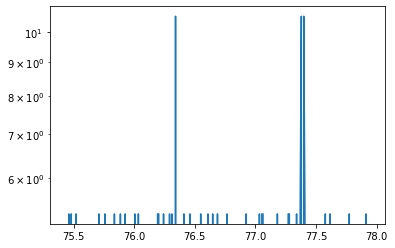

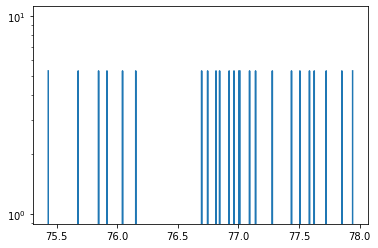

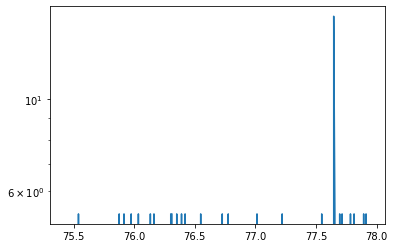

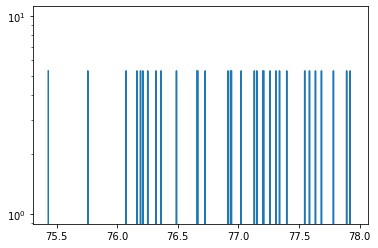

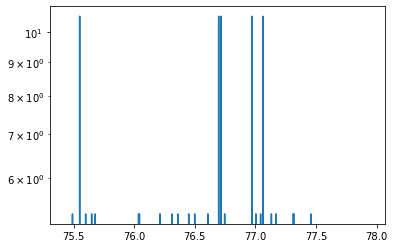

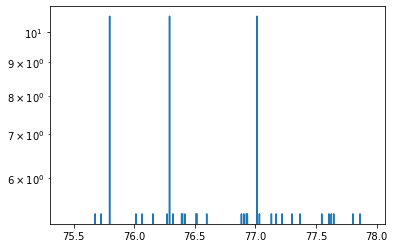

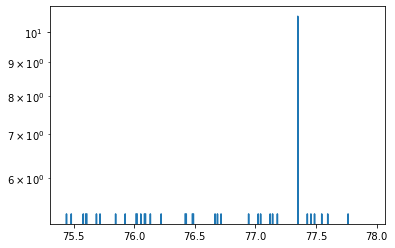

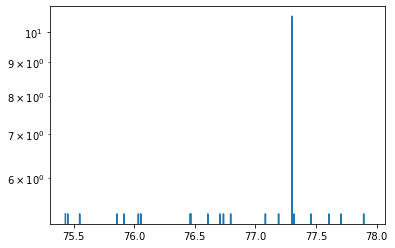

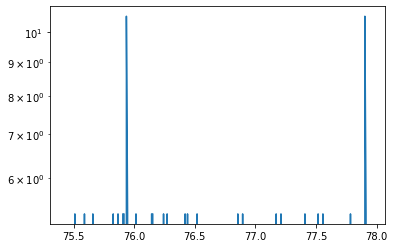

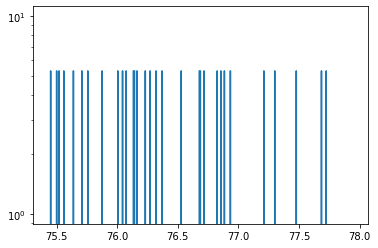

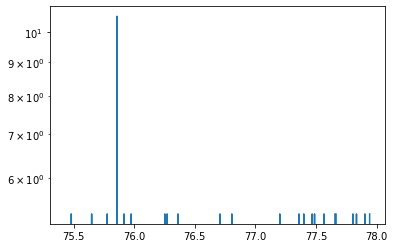

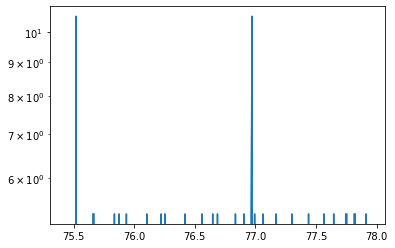

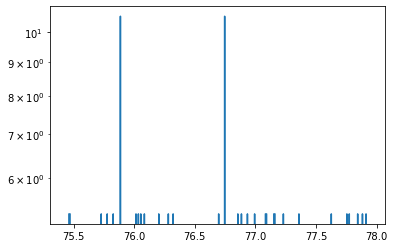

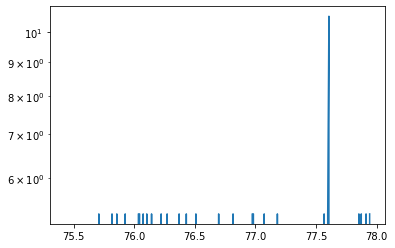

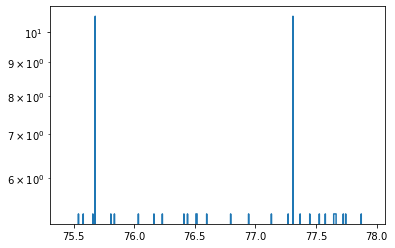

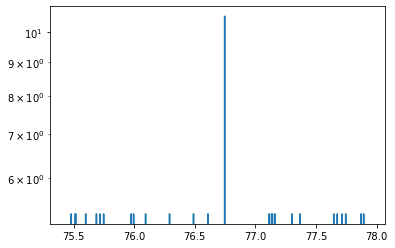

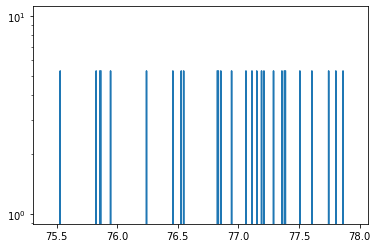

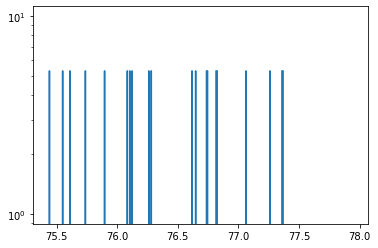

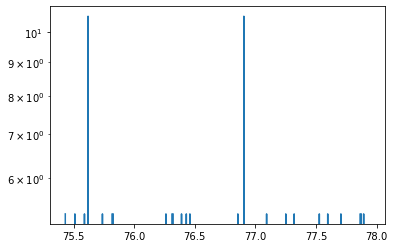

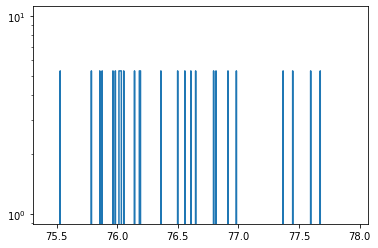

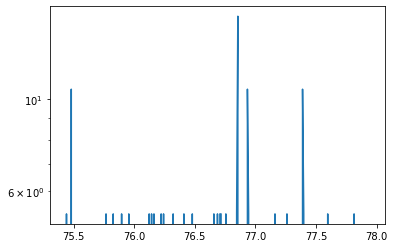

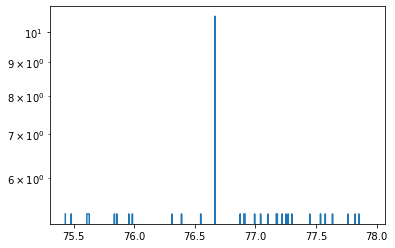

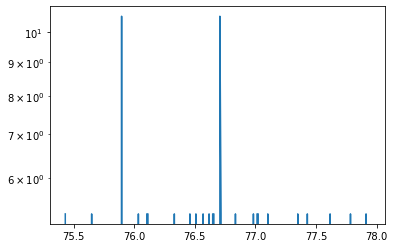

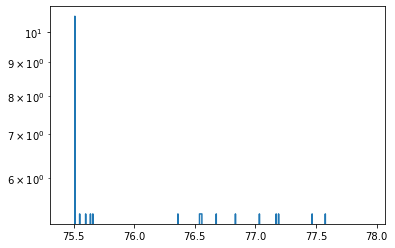

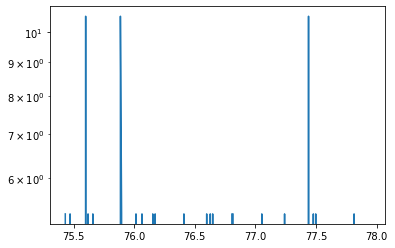

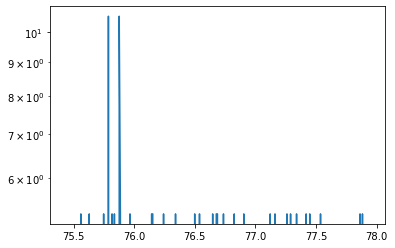

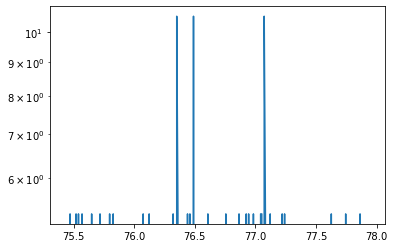

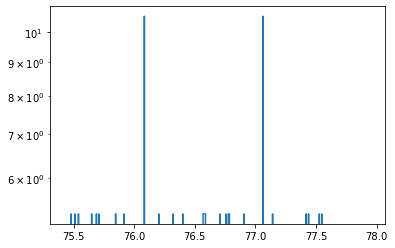

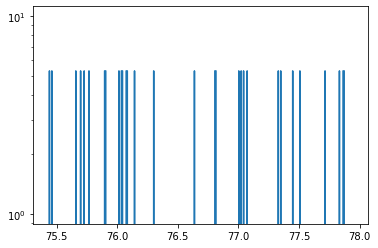

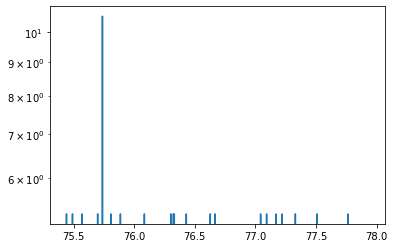

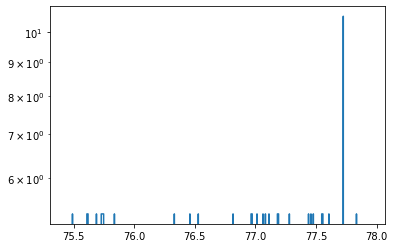

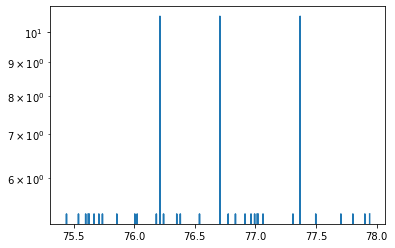

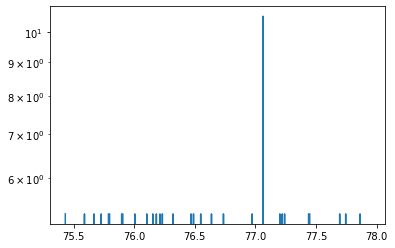

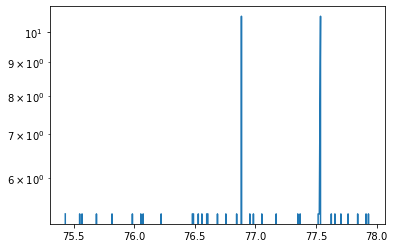

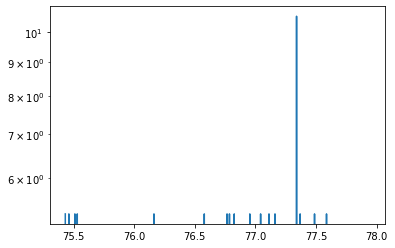

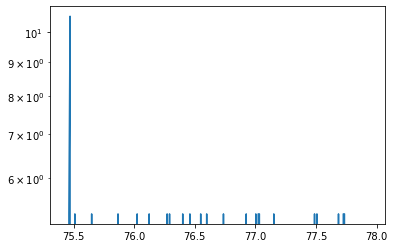

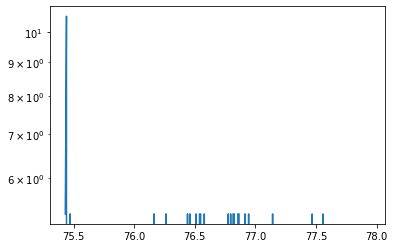

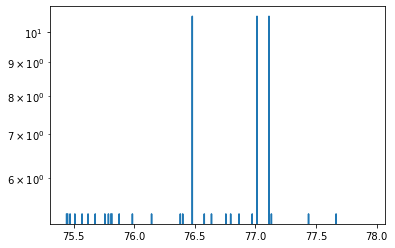

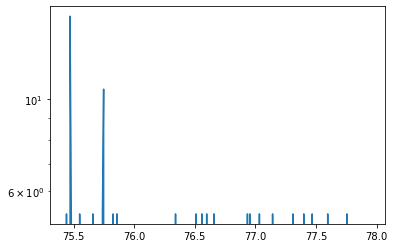

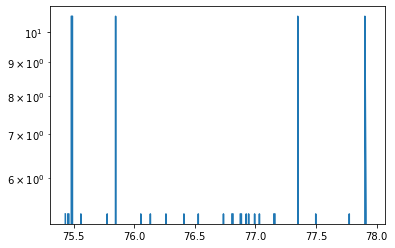

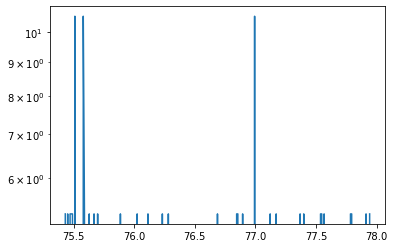

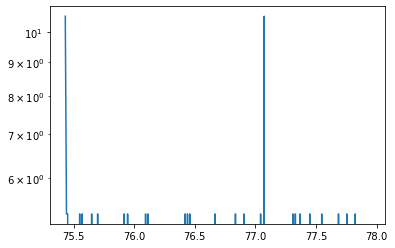

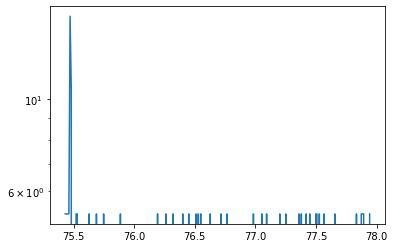

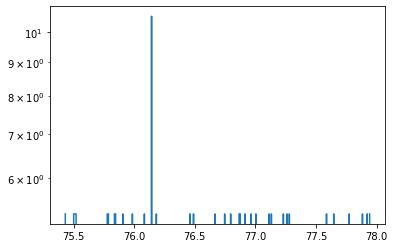

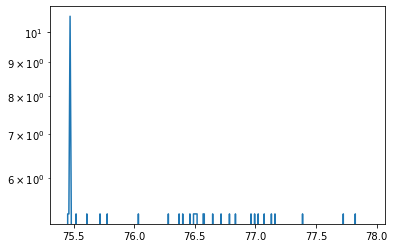

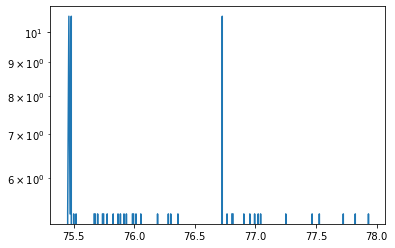

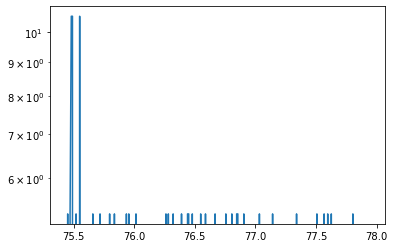

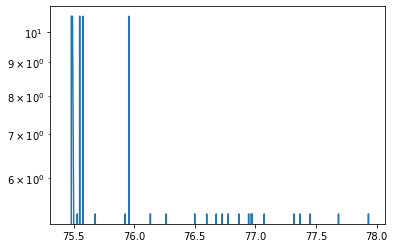

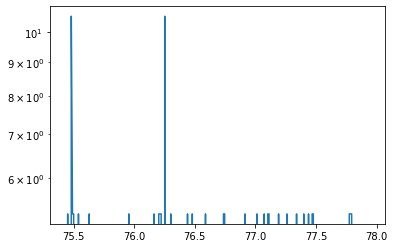

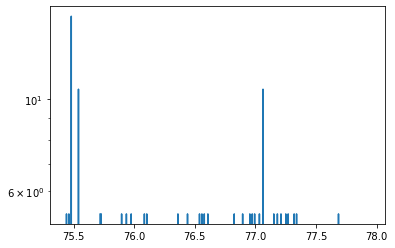

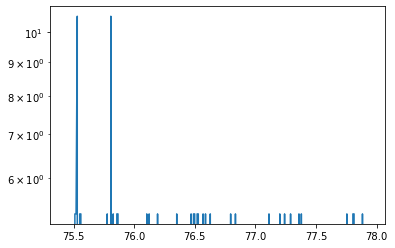

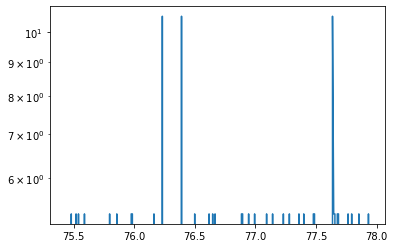

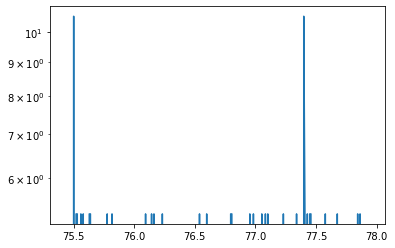

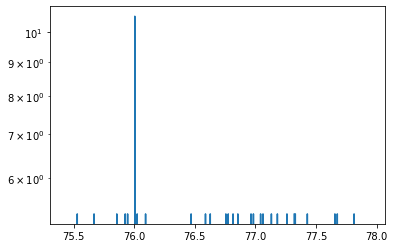

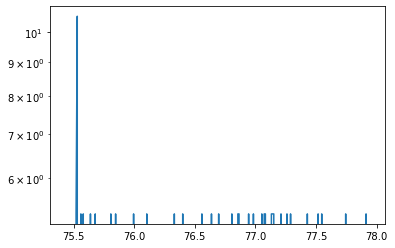

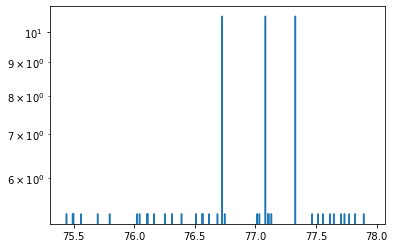

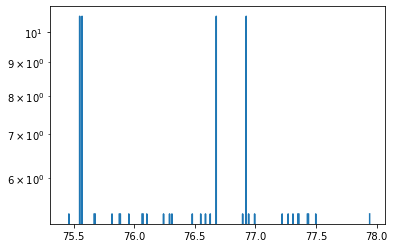

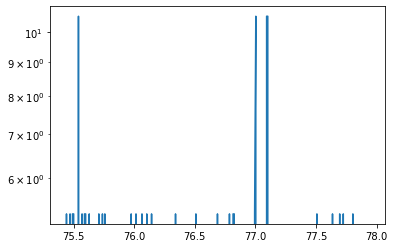

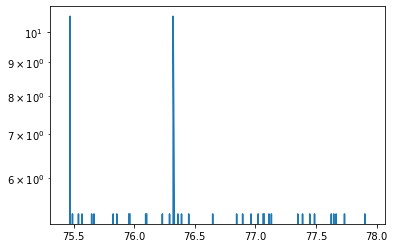

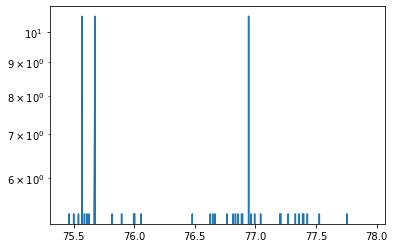

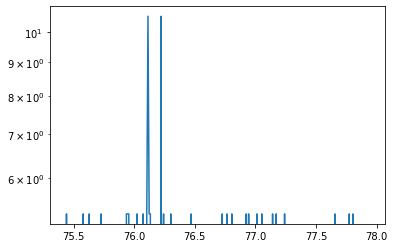

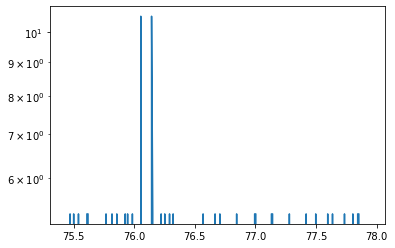

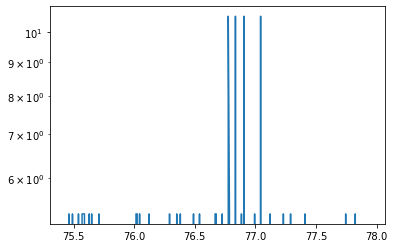

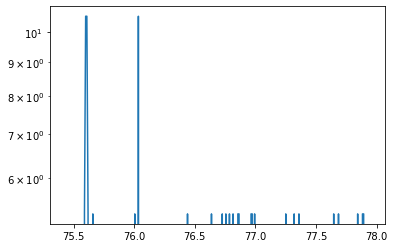

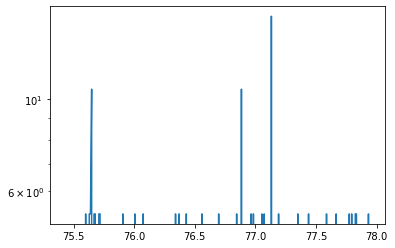

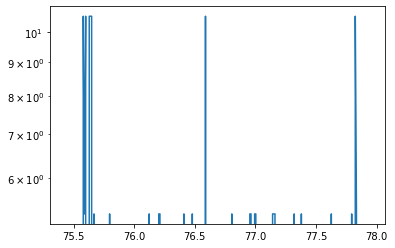

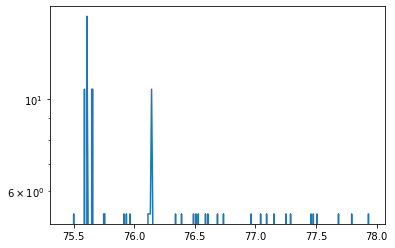

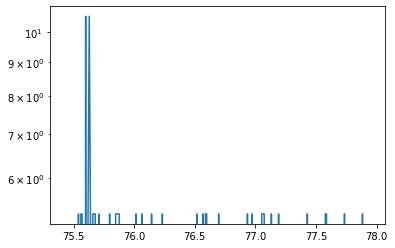

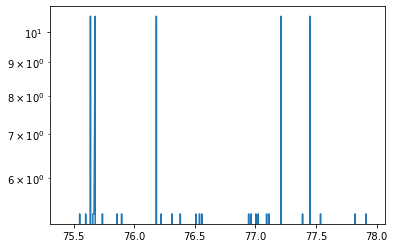

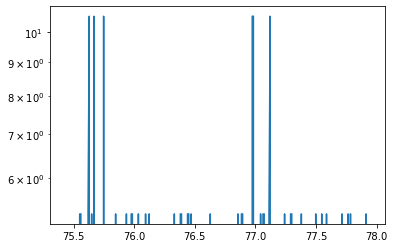

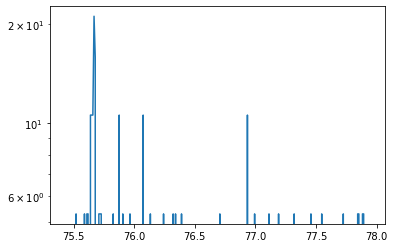

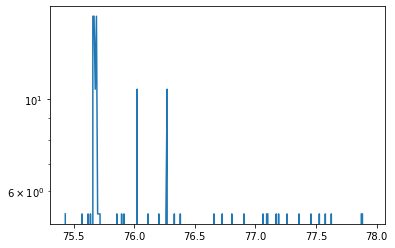

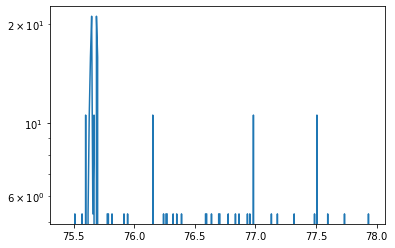

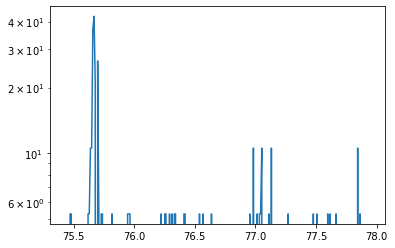

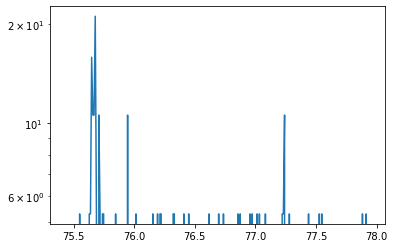

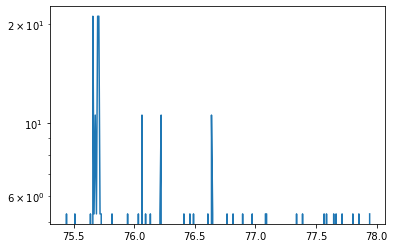

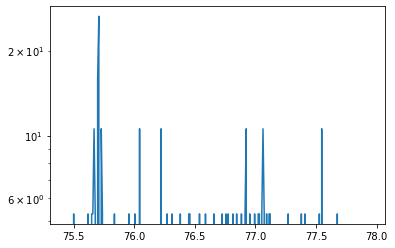

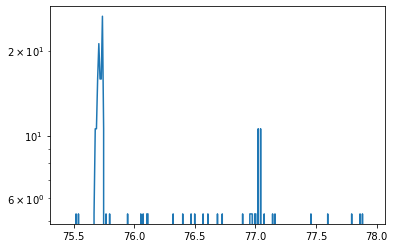

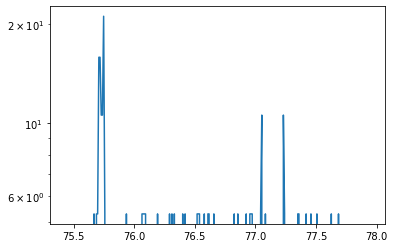

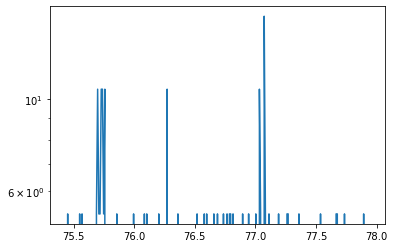

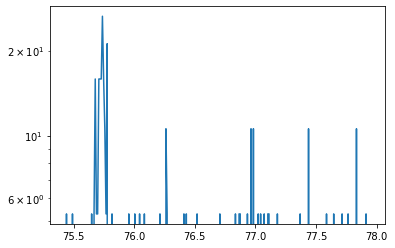

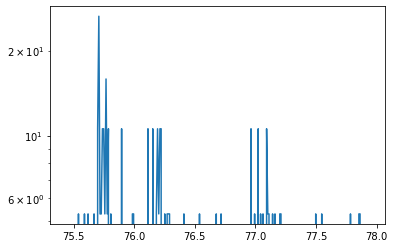

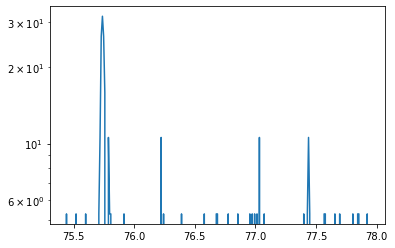

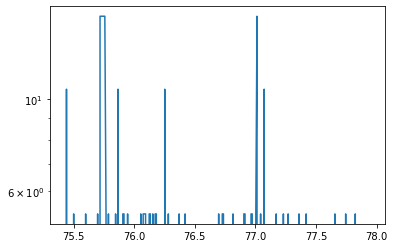

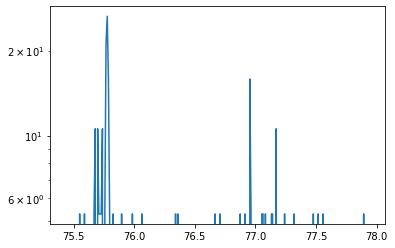

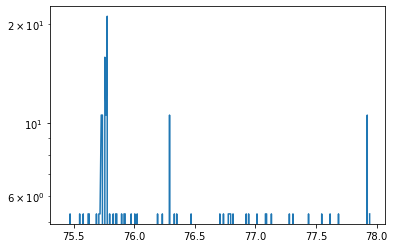

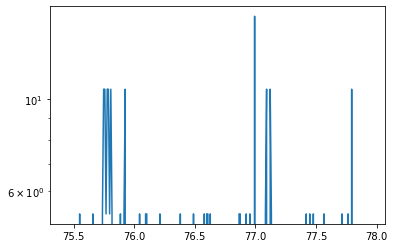

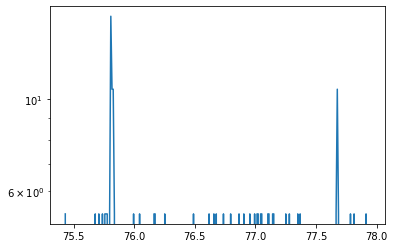

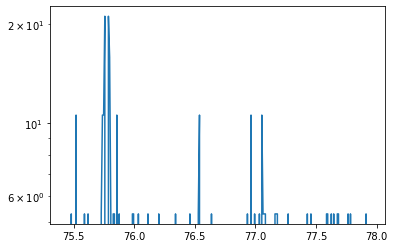

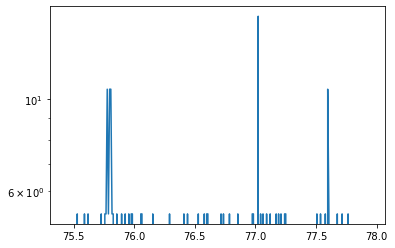

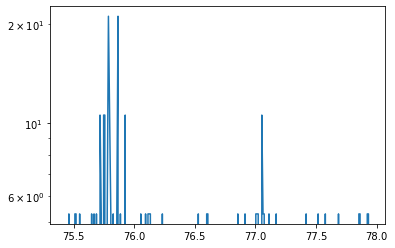

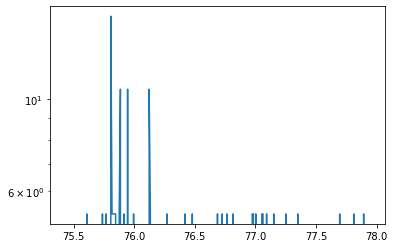

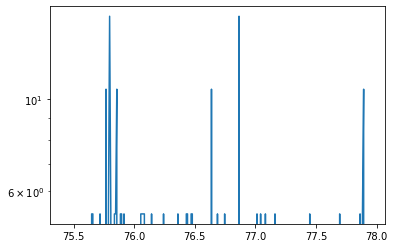

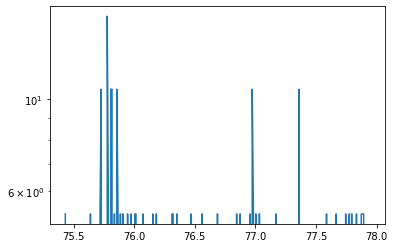

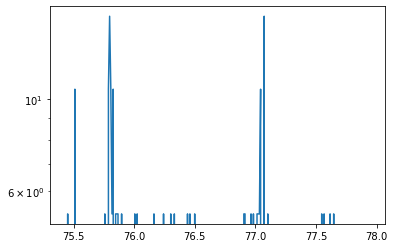

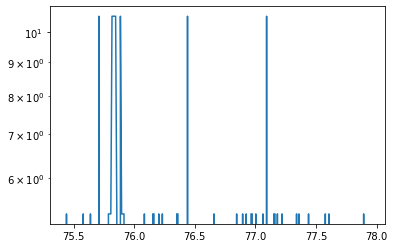

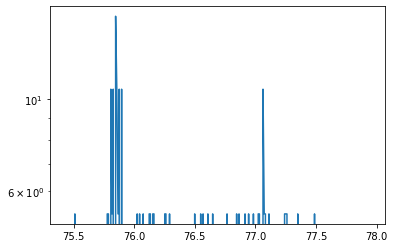

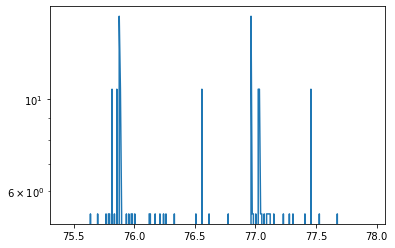

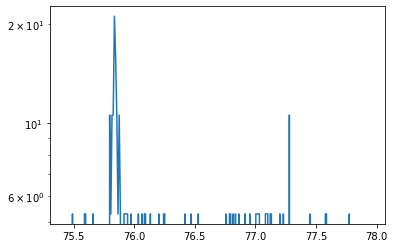

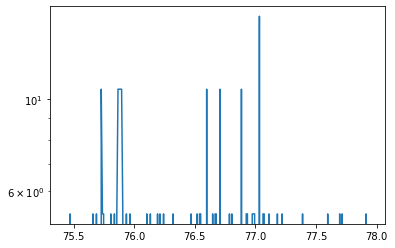

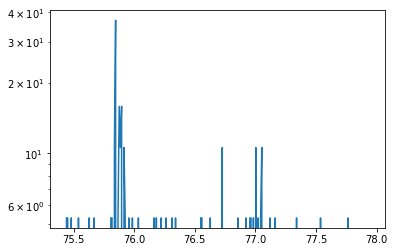

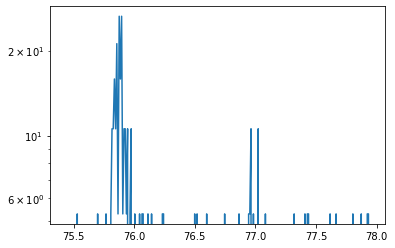

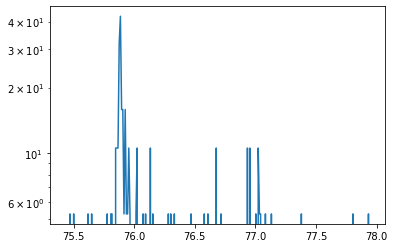

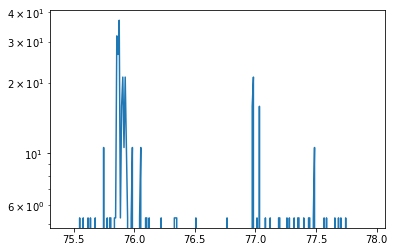

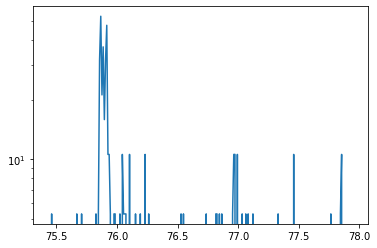

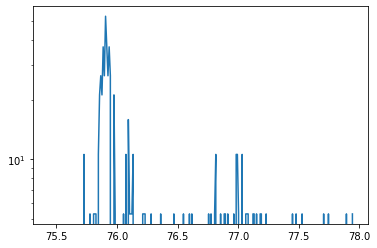

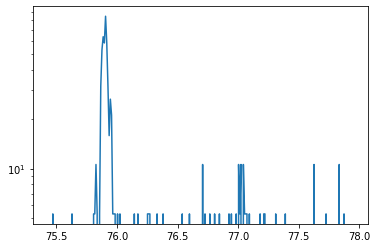

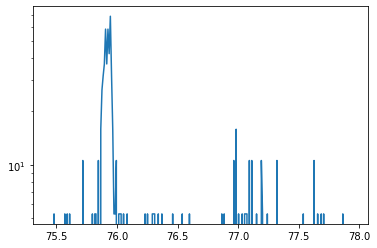

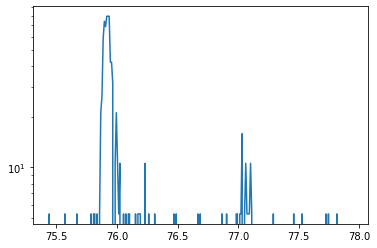

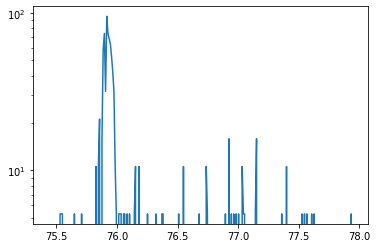

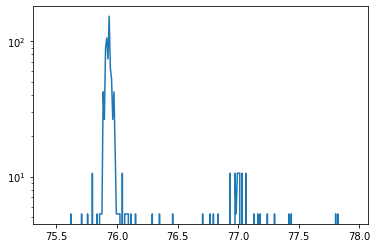

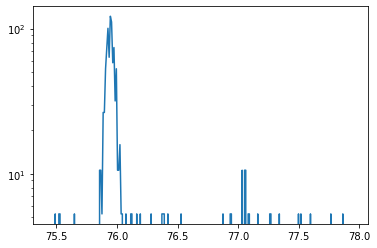

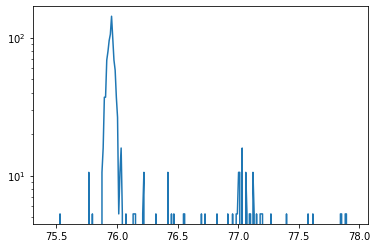

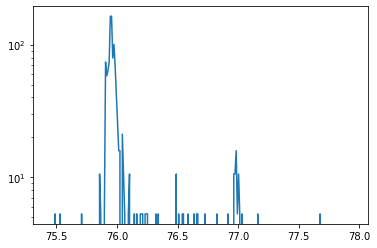

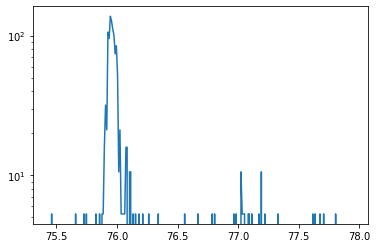

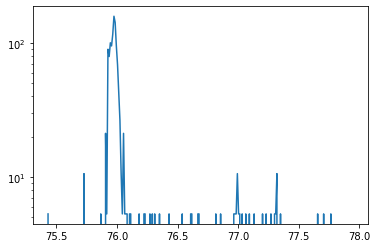

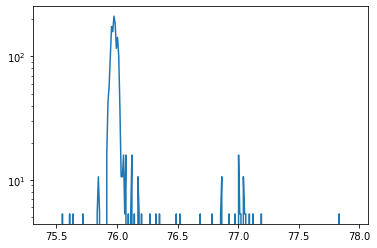

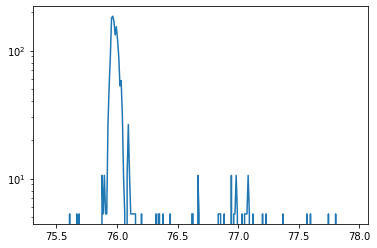

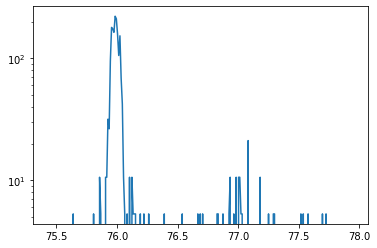

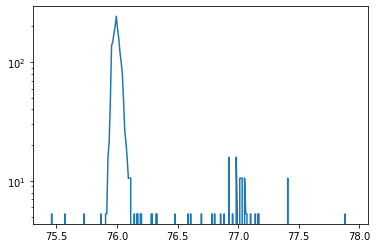

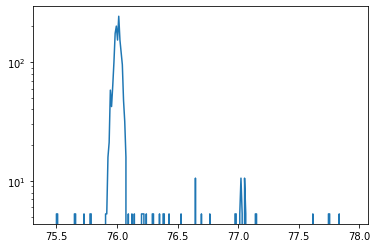

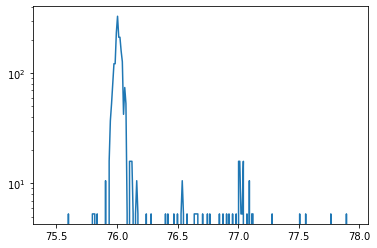

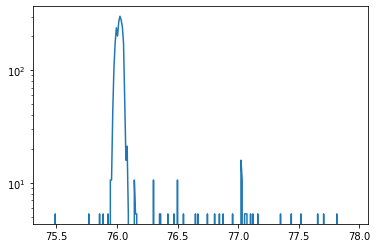

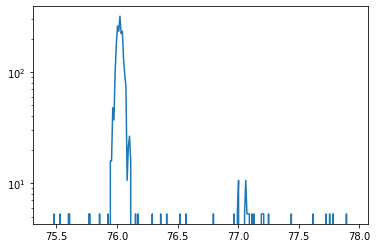

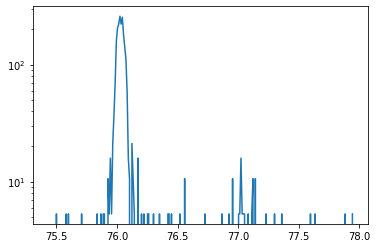

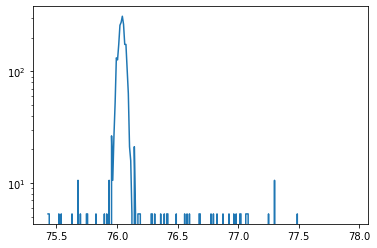

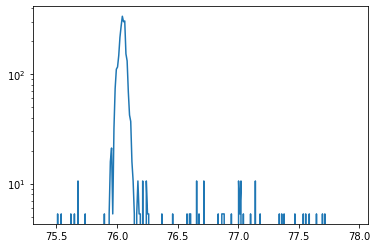

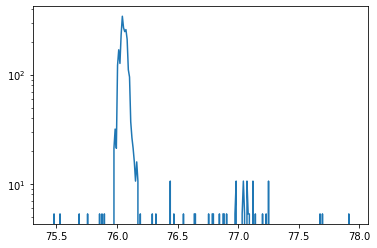

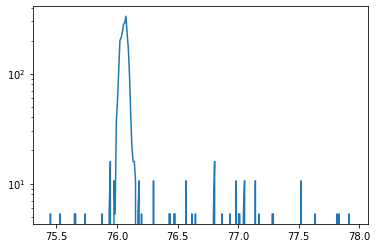

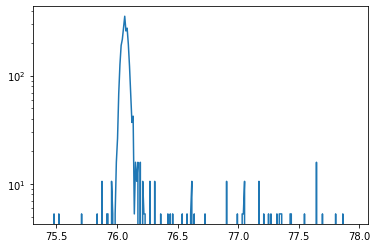

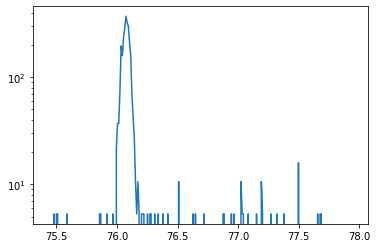

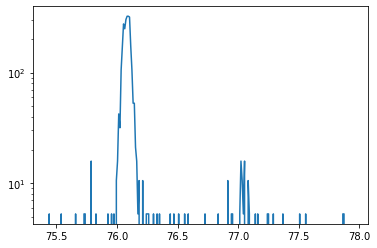

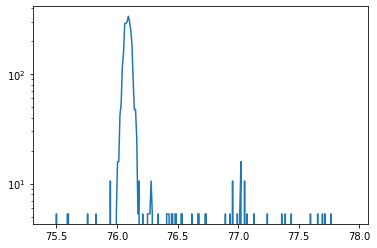

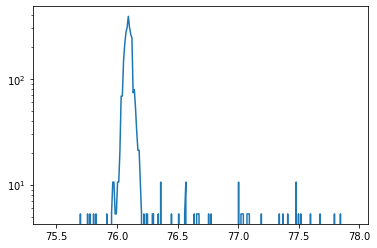

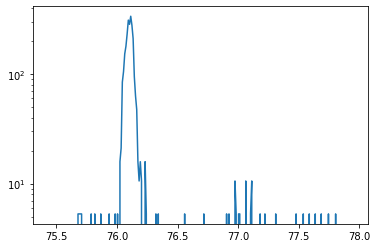

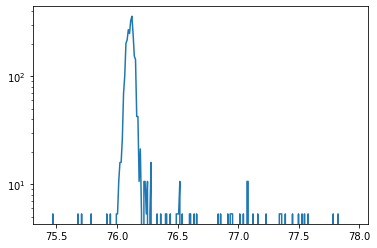

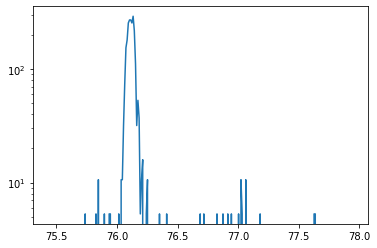

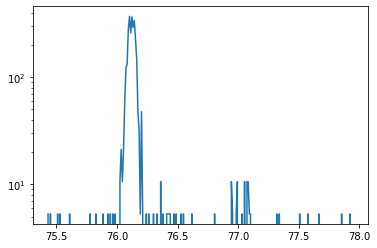

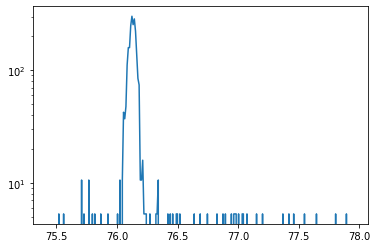

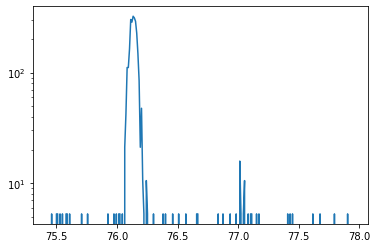

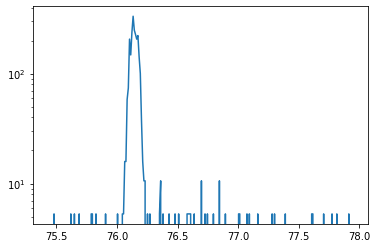

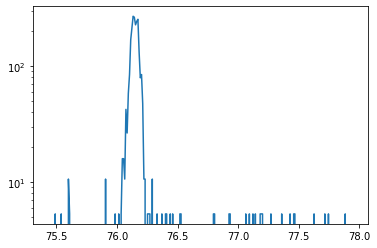

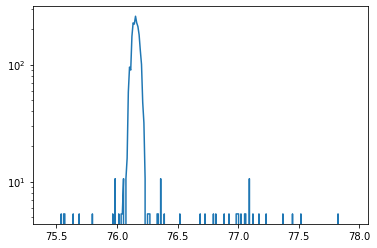

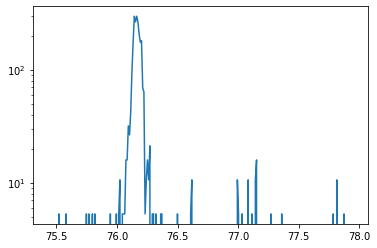

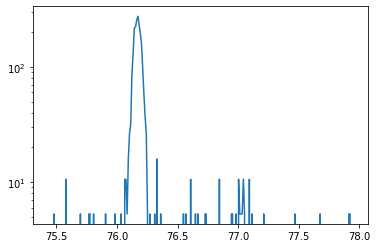

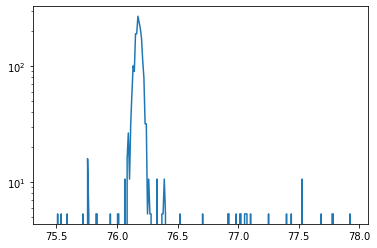

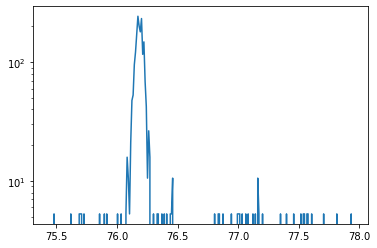

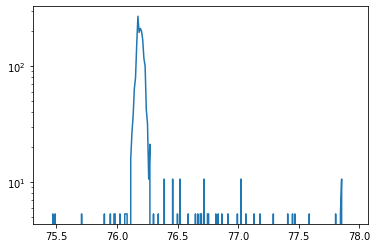

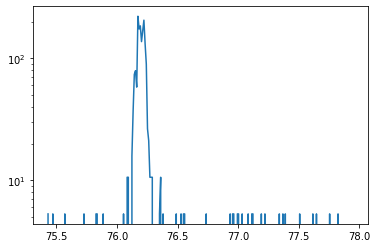

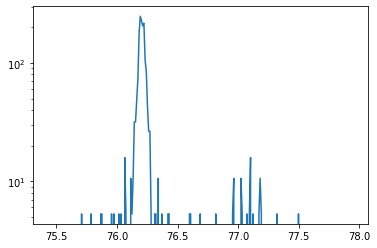

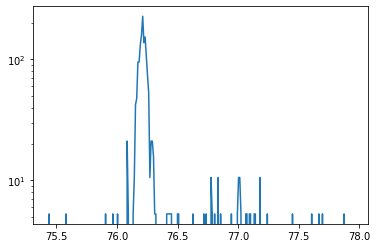

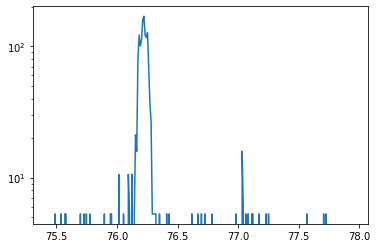

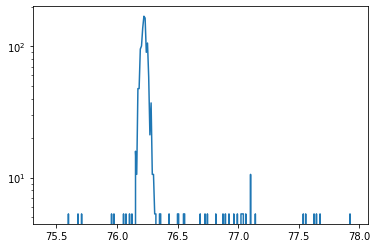

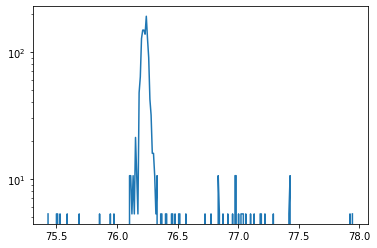

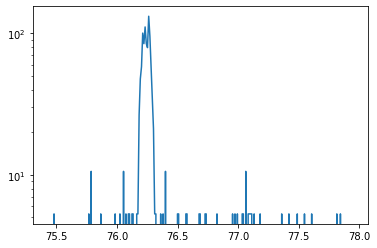

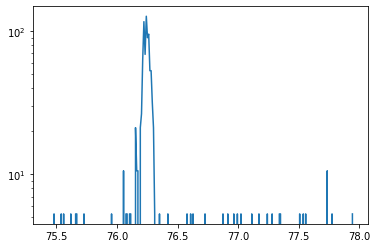

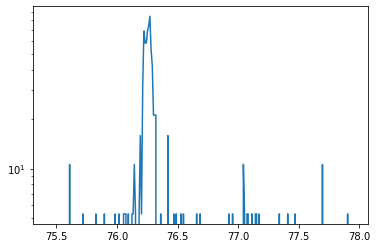

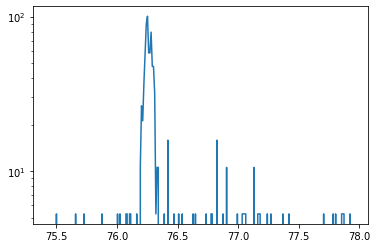

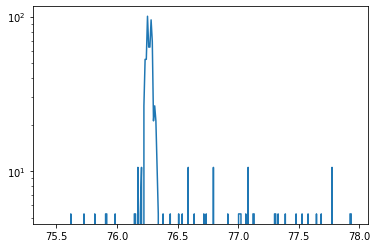

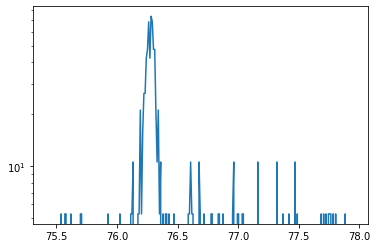

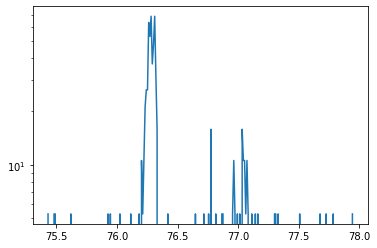

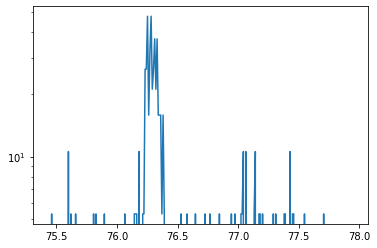

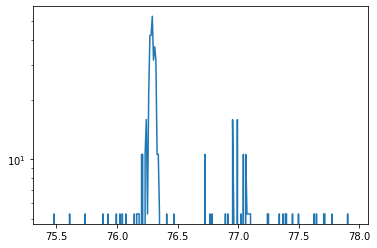

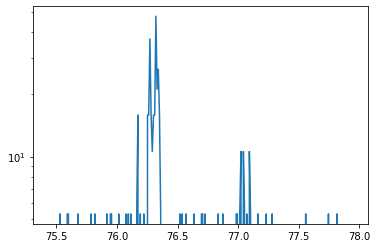

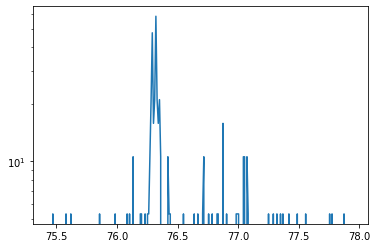

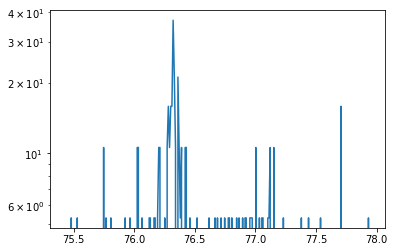

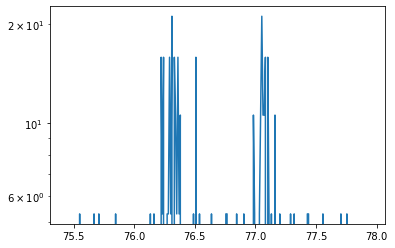

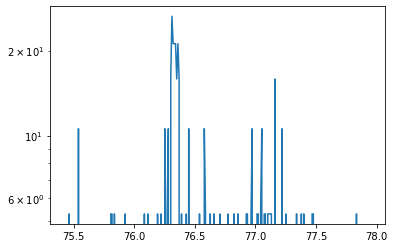

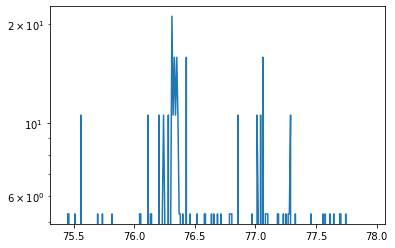

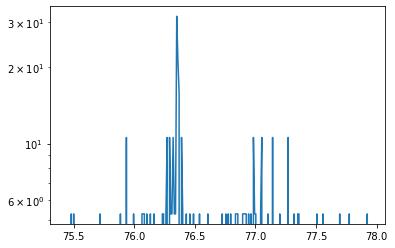

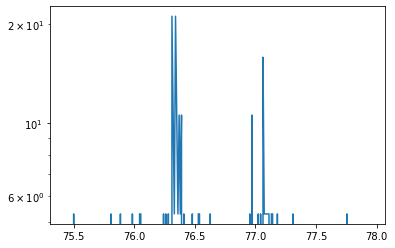

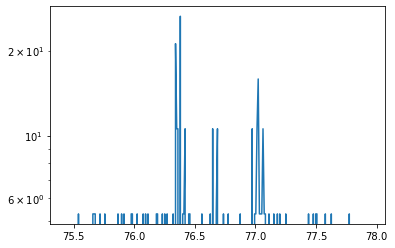

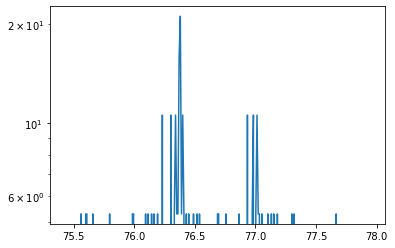

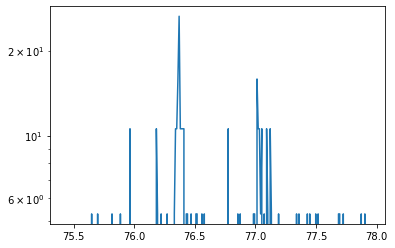

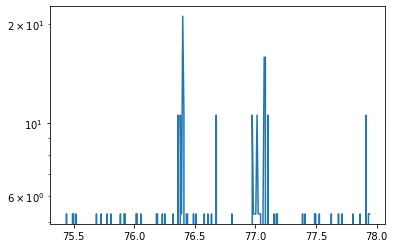

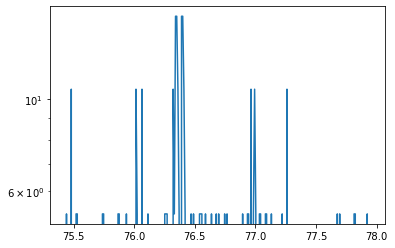

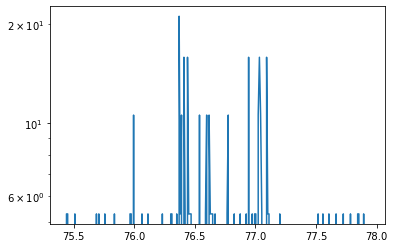

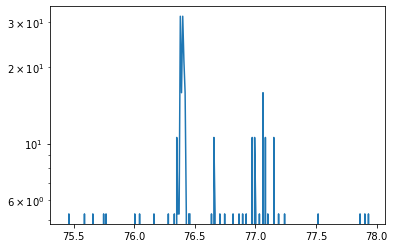

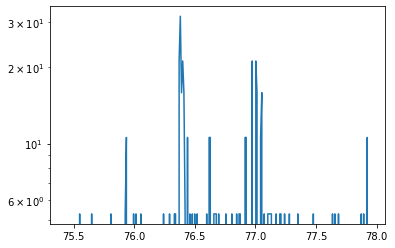

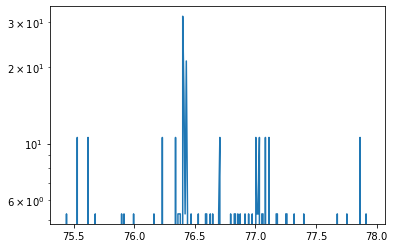

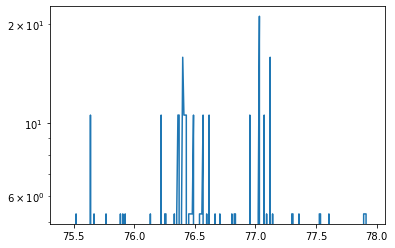

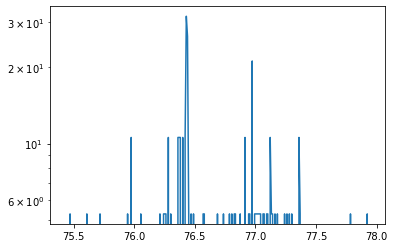

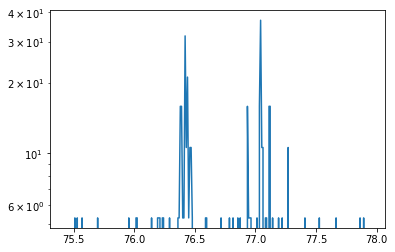

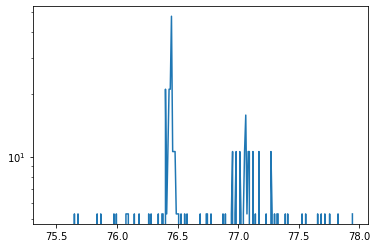

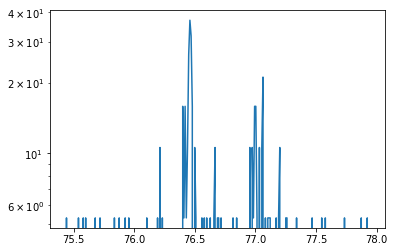

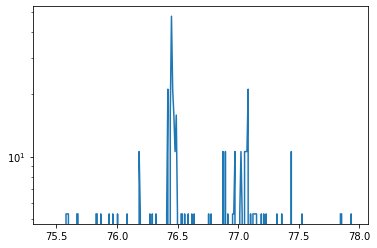

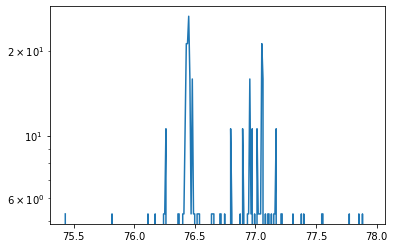

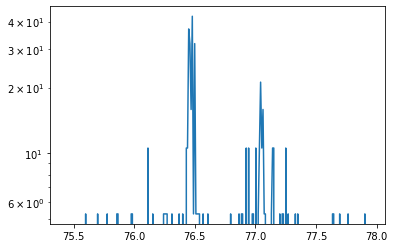

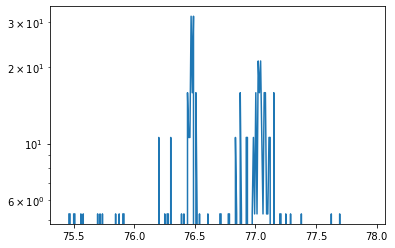

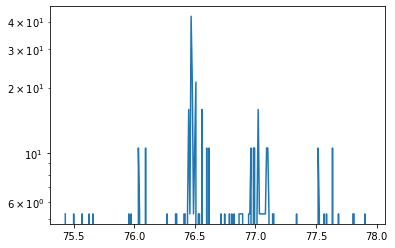

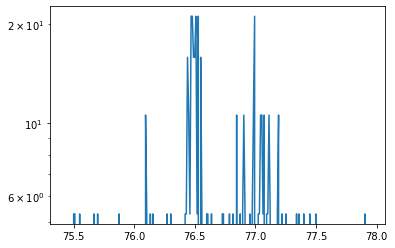

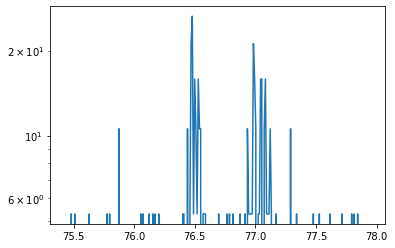

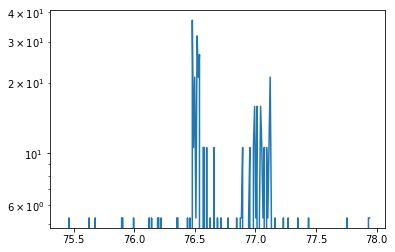

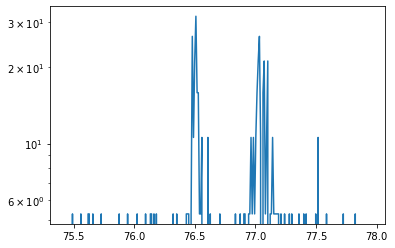

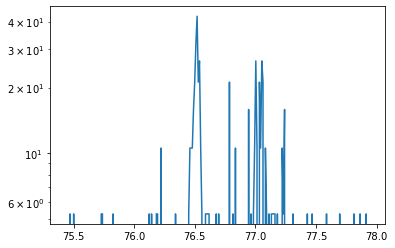

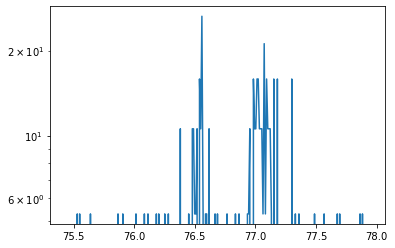

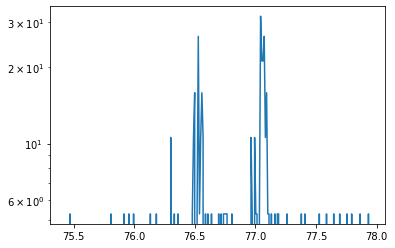

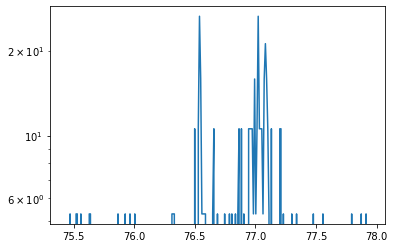

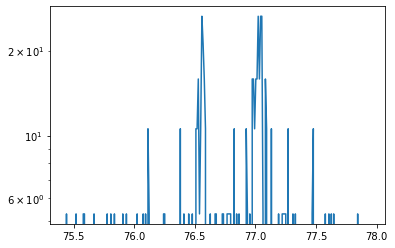

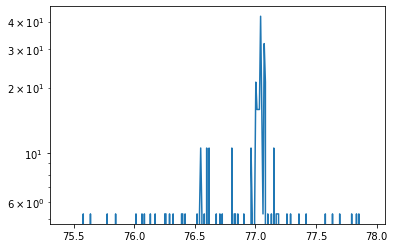

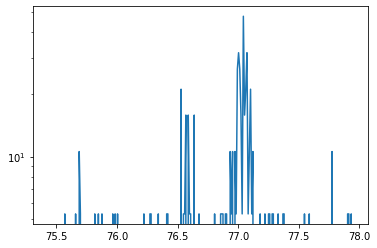

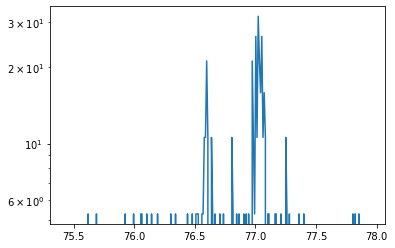

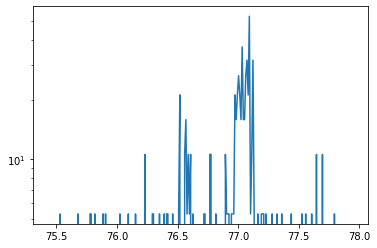

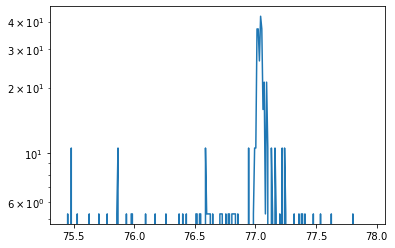

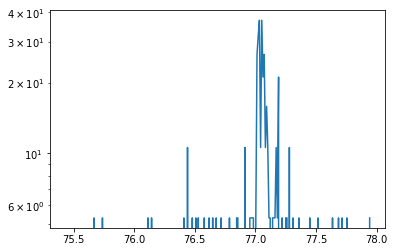

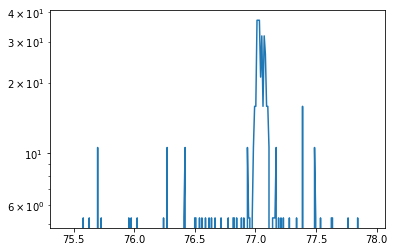

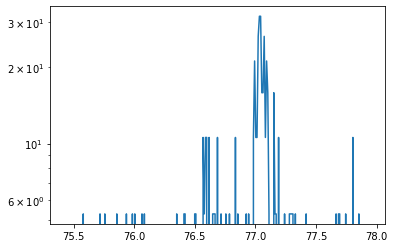

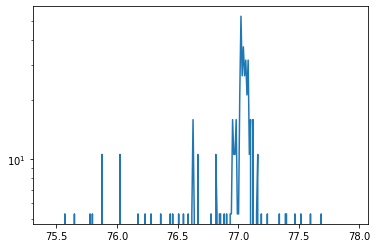

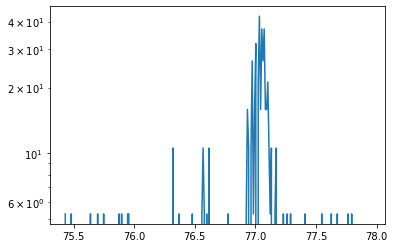

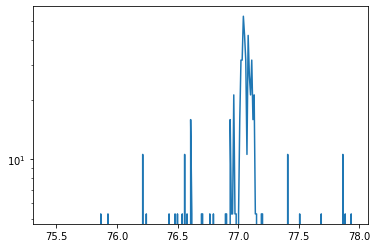

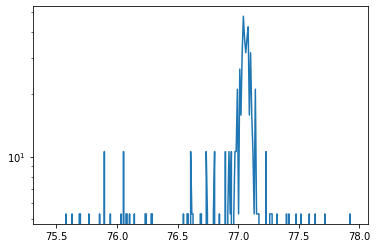

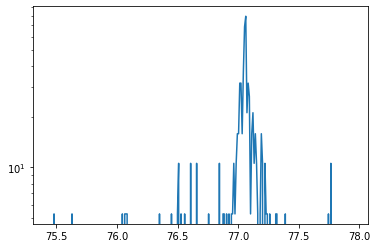

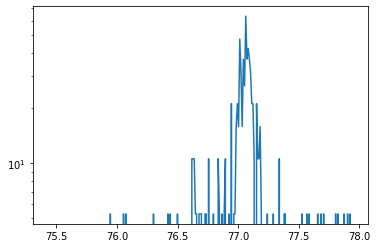

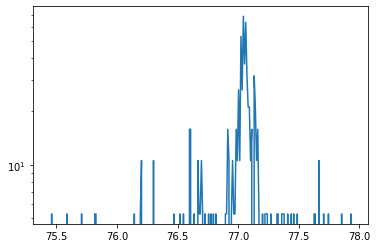


KeyboardInterrupt



In [33]:
for i in range(len(out[0])):
    plt.plot(out[0][i], out[1][i])
    plt.yscale('log',base=10)
    plt.show()

In [17]:
file = './xrd/YG021-SRO001-STO001-05252022.xrdml'
out = xu.io.getxrdml_scan(file)

In [18]:
out[0].shape, out[1].shape

((3000,), (3000,))

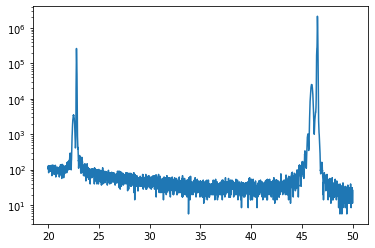

In [23]:
plt.plot(out[0], out[1])
plt.yscale('log',base=10)

In [8]:
# pip install xrayutilities
import numpy as np
import xrayutilities as xu
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

def plot_xrd(files, labels, save_path=None, marker=None):
    Ys = [] 
    for file in files:
        out = xu.io.getxrdml_scan(file)

        X = out[0] 
        Ys.append(np.array(out[1:]).reshape(-1))
        
    if len(Ys) == 1:
        fig, axes = plt.subplots(len(Ys), 1, figsize=(15,6))
        for i, Y in enumerate(Ys):
            axes.plot(X, Y, marker=marker, label=labels[i])
            axes.set_xlabel(r"2$\Theta}$", )
            axes.set_ylabel('Intensity [a.u.]')
            axes.set_yscale('log',base=10) 
            axes.set_ylim([1, 1e7])
            axes.legend(loc='center')
            axes.spines['top'].set_visible(False)
    
    else:
        fig, axes = plt.subplots(len(Ys), 1, figsize=(18, int(3*len(Ys))))
        for i, Y in enumerate(Ys):
            axes[i].plot(X, Y, marker=marker, label=labels[i])
            axes[i].set_xlabel(r"2$\Theta}$", )
            axes[i].set_ylabel('Intensity [a.u.]')
            axes[i].set_yscale('log',base=10) 
            axes[i].set_ylim([1, 1e7])
            axes[i].legend(loc='center')
            axes[i].spines['top'].set_visible(False)

    fig.tight_layout()
    plt.show()

    if save_path:
        plt.savefig(save_path, dpi=1200)
        plt.show()

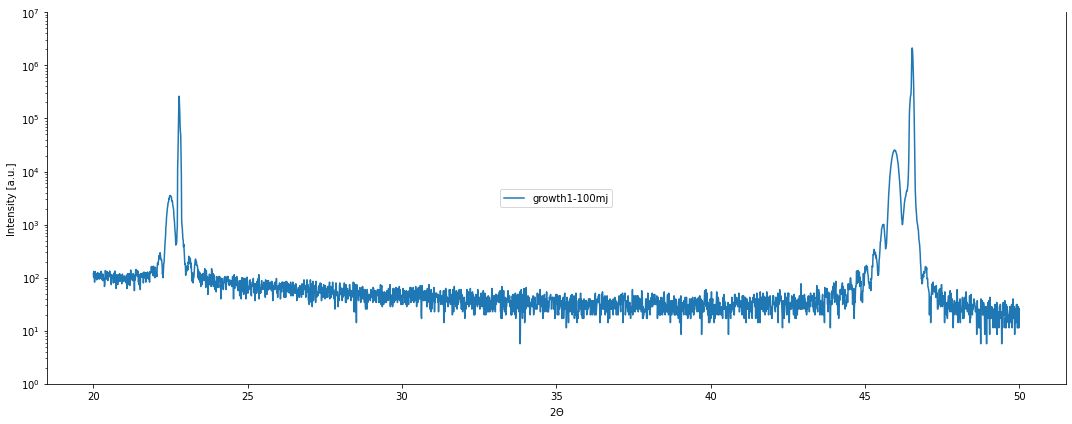

In [9]:
files = ['./xrd/YG021-SRO001-STO001-05252022.xrdml']
labels = ['growth1-100mj']
plot_xrd(files, labels)

In [103]:
# pip install xrayutilities
import numpy as np
import xrayutilities as xu
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

def plot_xrd(files, labels, save_path=None, marker=None):
    Ys = [] 
    for file in files:
        out = xu.io.getxrdml_scan(file)

        X = out[0] 
        Ys.append(np.array(out[1:]).reshape(-1))
        
    fig, axes = plt.subplots(len(Ys), 1, figsize=(18, int(3*len(Ys))))
    
    for i, Y in enumerate(Ys):
#         Y = Y + 10**(diff*i+2)
        axes[i].plot(X, Y, marker=marker, label=labels[i])
        axes[i].set_xlabel(r"2$\Theta}$", )
        axes[i].set_ylabel('Intensity [a.u.]')
        axes[i].set_yscale('log',base=10) 
#         axes[i].set_title(labels[i])
        axes[i].set_ylim([1, 1e7])
        
        axes[i].legend(loc='center')
        axes[i].spines['top'].set_visible(False)
#         axes[i].spines['right'].set_visible(False)
#         axes[i].spines['bottom'].set_visible(False)
#         axes[i].spines['left'].set_visible(False)
    fig.tight_layout()
    plt.show()

    if save_path:
        plt.savefig(save_path, dpi=1200)
        plt.show()

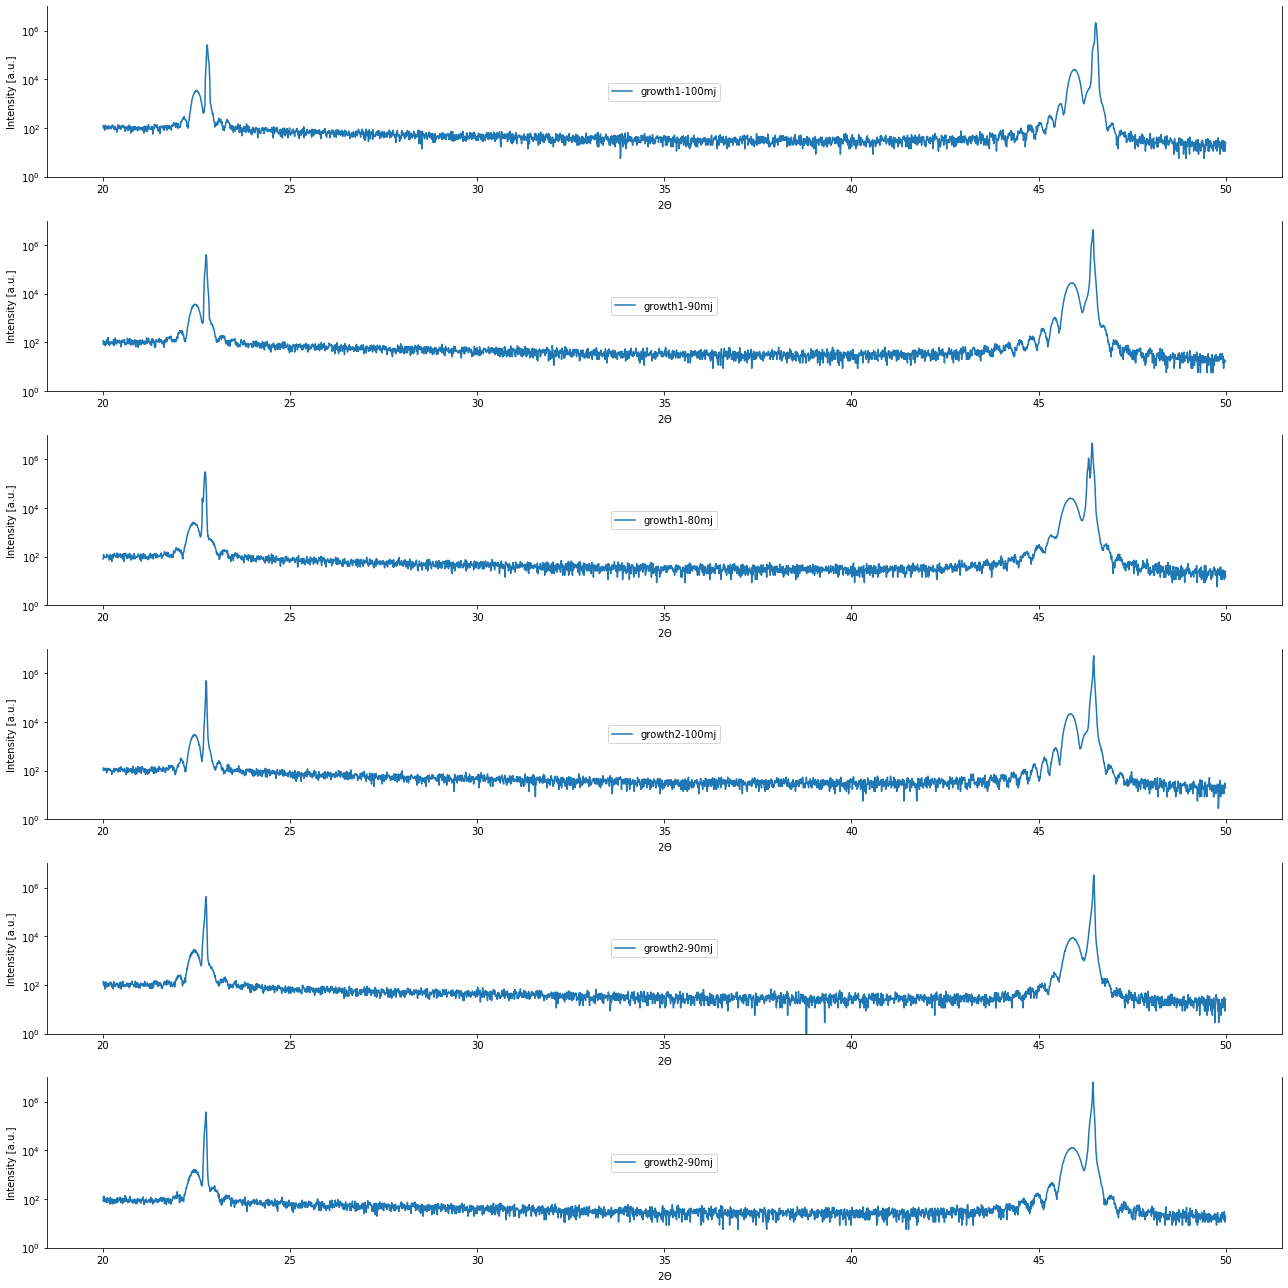

In [104]:
# %matplotlib notebook
%matplotlib inline

files = [
        './xrd/YG021-SRO001-STO001-05252022.xrdml',
        './xrd/YG022-SRO001-STO001-05252022.xrdml',
        './xrd/YG023-SRO001-STO001-05292022-parallel.xrdml',
        './xrd/YG024-SRO001-STO001-05292022.xrdml',
        './xrd/YG025-SRO001-STO001-05302022.xrdml',
        './xrd/YG026-SRO001-STO001-05302022.xrdml',
#         './xrd/YG027-SRO001-STO001-05312022.xrdml',
        ]

labels = ['growth1-100mj', 'growth1-90mj', 'growth1-80mj', 
          'growth2-100mj', 'growth2-90mj', 'growth2-90mj']
plot_xrd(files, labels)

In [106]:
# pip install xrayutilities
import numpy as np
import xrayutilities as xu
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

def plot_xrd(files, labels, title='XRD result', diff=1, save_path=None, marker=None):
    Ys = [] 
    for file in files:
        out = xu.io.getxrdml_scan(file)

        X = out[0] 
        Ys.append(np.array(out[1:]).reshape(-1))
        
    fig, axes = plt.subplots(figsize=(18, 10))
    
    for i, Y in enumerate(Ys):
        Y = Y + 10**(diff*i+2)
        axes.plot(X, Y, marker=marker, label=labels[i])
        
    axes.set_xlabel(r"2$\Theta}$", )
    axes.set_ylabel('Intensity [a.u.]')
    axes.legend()
    plt.yscale('log',base=10) 
    plt.title(title)

    if save_path:
        plt.savefig(save_path, dpi=1200)
        plt.show()

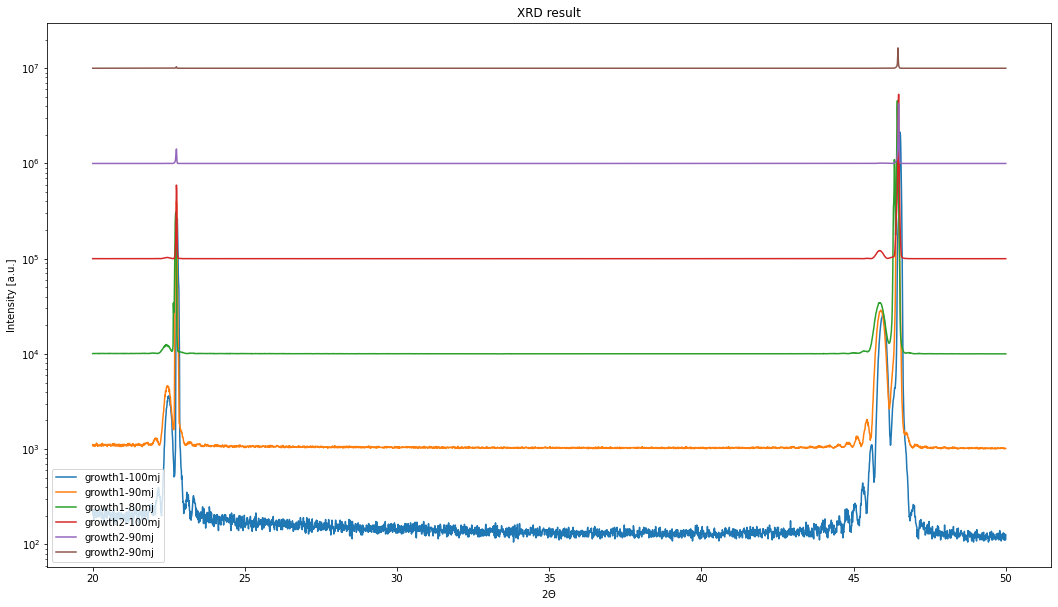

In [107]:
# %matplotlib notebook
%matplotlib inline

files = [
        './xrd/YG021-SRO001-STO001-05252022.xrdml',
        './xrd/YG022-SRO001-STO001-05252022.xrdml',
        './xrd/YG023-SRO001-STO001-05292022-parallel.xrdml',
        './xrd/YG024-SRO001-STO001-05292022.xrdml',
        './xrd/YG025-SRO001-STO001-05302022.xrdml',
        './xrd/YG026-SRO001-STO001-05302022.xrdml',
#         './xrd/YG027-SRO001-STO001-05312022.xrdml',
        ]

labels = ['growth1-100mj', 'growth1-90mj', 'growth1-80mj', 
          'growth2-100mj', 'growth2-90mj', 'growth2-90mj']
plot_xrd(files, labels)

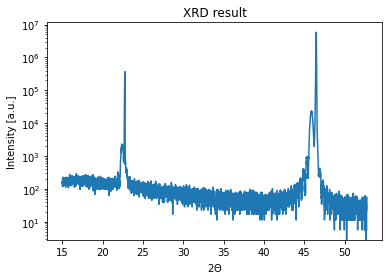

In [4]:
file = './xrd/MA_SRO_STO001_8.xrdml'
plot_xrd(file, save_path=file[:-6]+'.png')

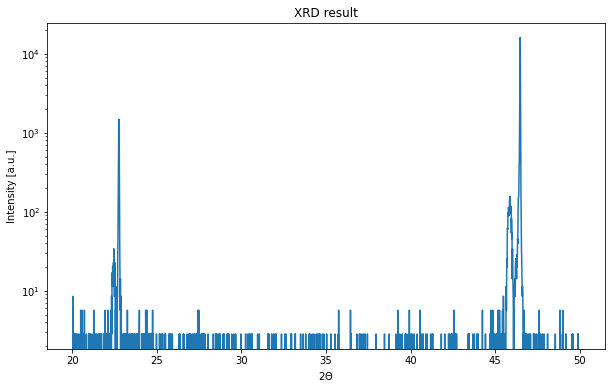

In [2]:
# %matplotlib notebook

file = './xrd/YG004-SRO001-STO001-04232022.xrdml'
plot_xrd(file, save_path=file[:-6]+'.png')

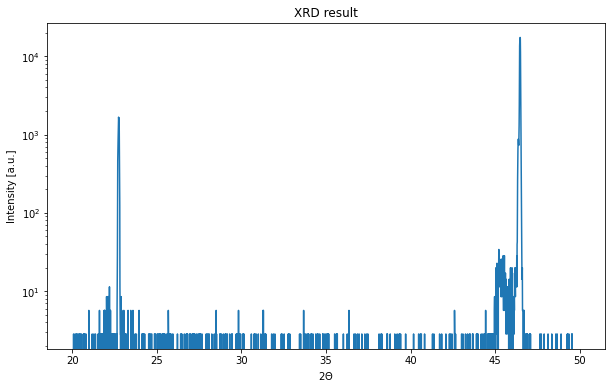

In [3]:
file = './xrd/YG010-SRO001-STO001-04232022.xrdml'
plot_xrd(file, save_path=file[:-6]+'.png')

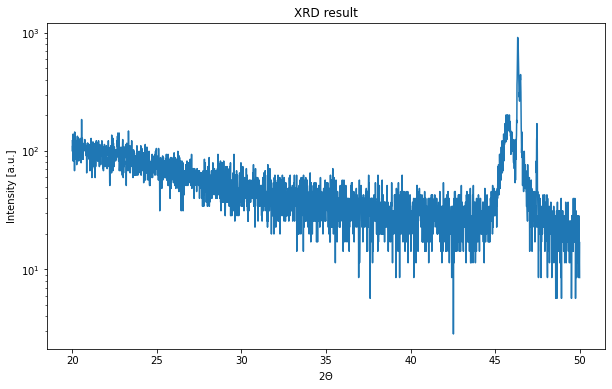

In [4]:
file = './xrd/YG011-SRO001-STO001-04232022.xrdml'
plot_xrd(file, save_path=file[:-6]+'.png')

<IPython.core.display.Javascript object>


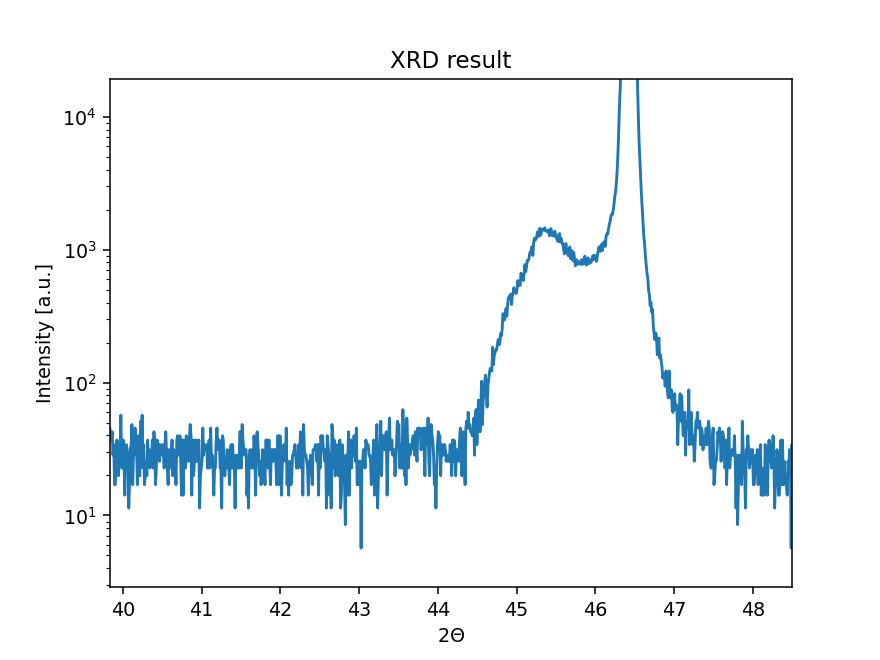

In [13]:
%matplotlib notebook
file = './xrd/YG012-SRO001-STO001-04232022.xrdml'
plot_xrd(file, save_path=file[:-6]+'.png')

<IPython.core.display.Javascript object>


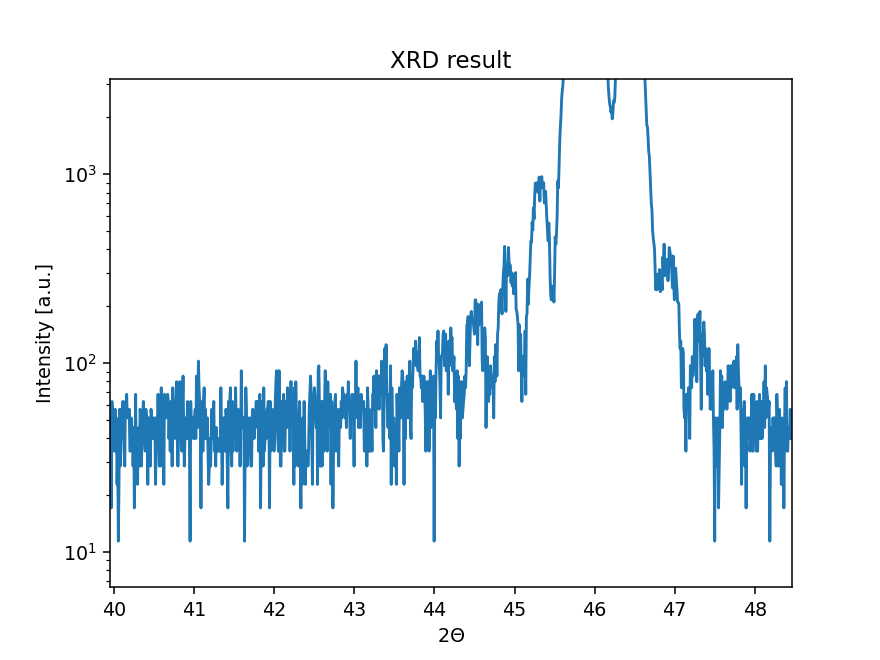

In [14]:
file = './xrd/MA_SRO_STO001_8.xrdml'
plot_xrd(file, save_path=file[:-6]+'.png')

<IPython.core.display.Javascript object>


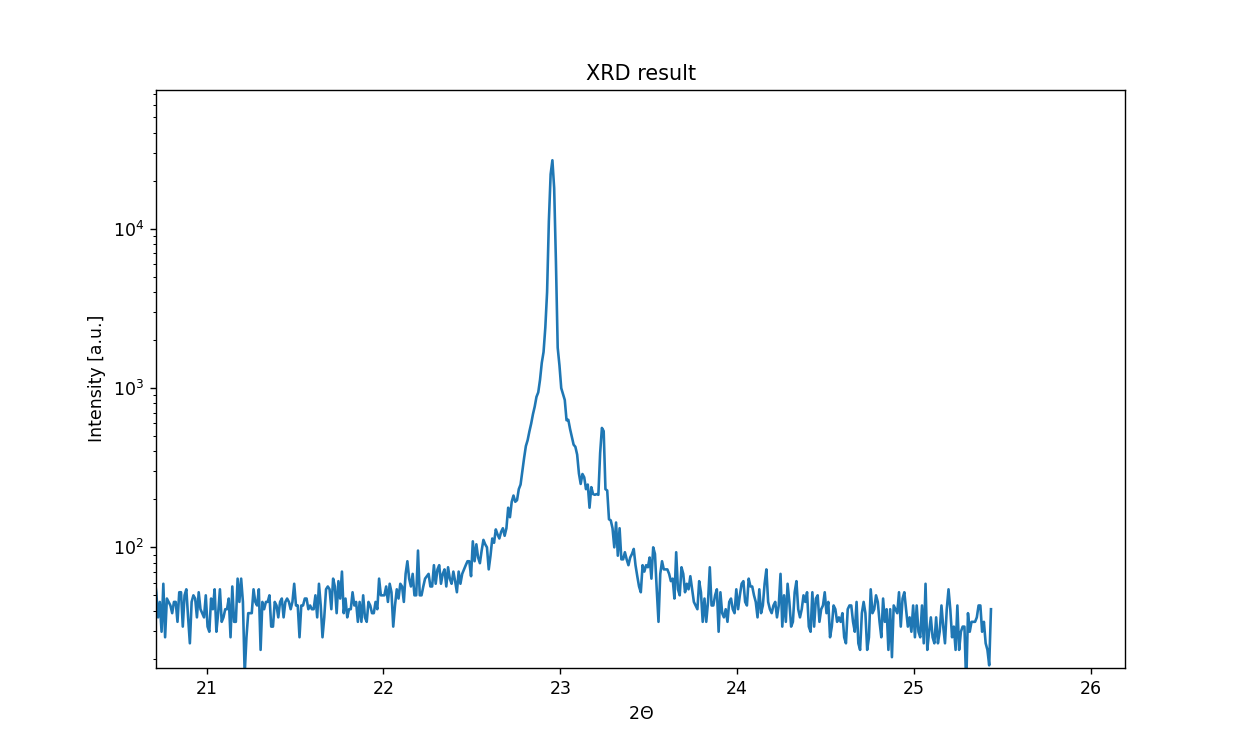

In [6]:
file = './MA_SRO_STO001_8_RC45.8884.xrdml'
plot_xrd(file, save_path=file[:-6]+'.png')

<IPython.core.display.Javascript object>


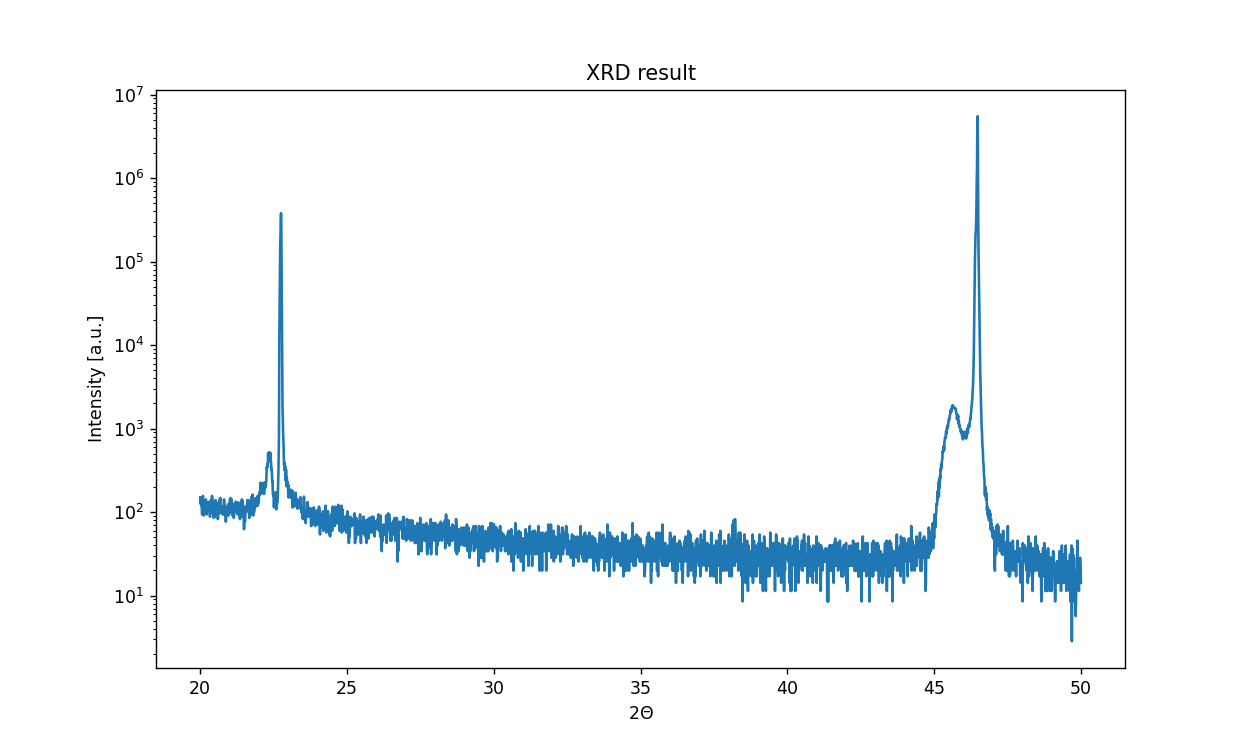

In [12]:
file = './YG003-SRO_001-STO_001-03282022.xrdml'
plot_xrd(file, save_path=file[:-6]+'.png')

# draft

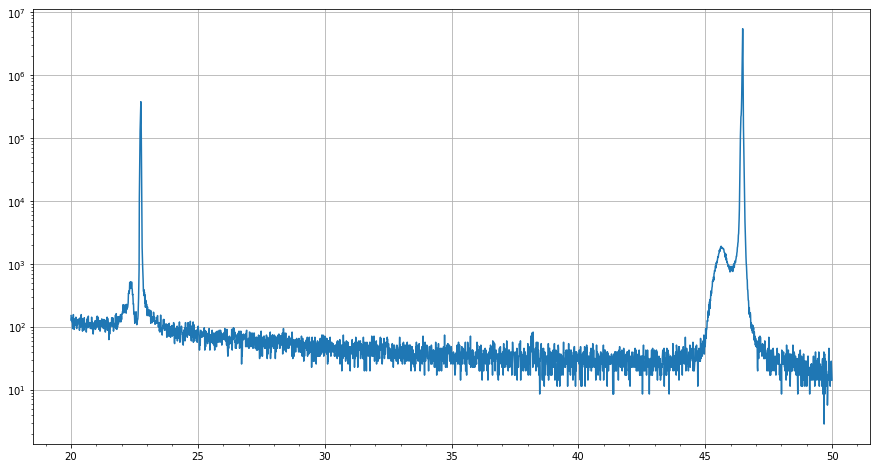

In [73]:
file = './YG003-SRO_001-STO_001-03282022.xrdml'
X = out[0] 
Y = out[1]

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1, 1, 1)
plt.plot(X, Y)

plt.yscale('log',base=10) 

spacing = 1 # This can be your user specified spacing. 
minorLocator = MultipleLocator(spacing)
ax.xaxis.set_minor_locator(minorLocator)

plt.grid()
plt.show()

In [22]:
import matplotlib.pyplot as plt


In [ ]:
xf.scan.

In [18]:
X = xf.scan.ddict['2Theta']
X.shape

(3000,)

In [24]:
Y = xf.scan.ddict['detector']
Y.shape

(3000,)

In [26]:
Y

array([150.56818182, 125.        , 139.20454545, ...,  22.72727273,
        17.04545455,  14.20454545])

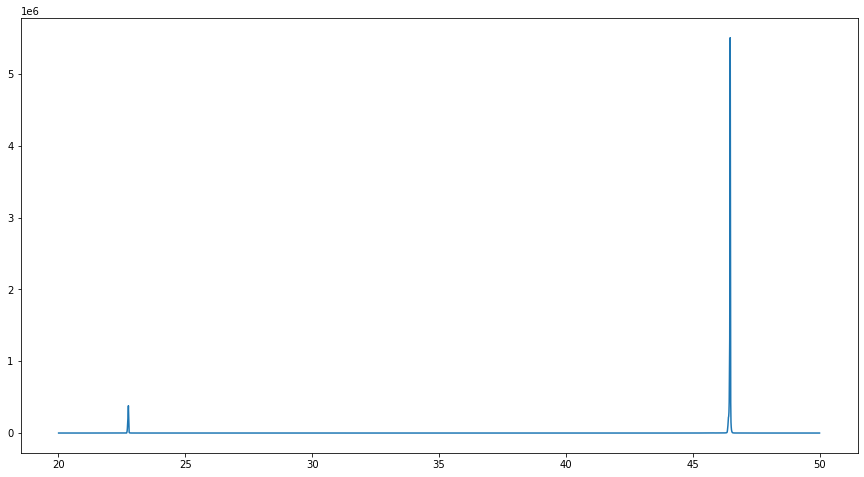

In [27]:
plt.figure(figsize=(15,8))
plt.plot(X, Y)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_xrd(file, title='XRD result', n=1, intensity_difference=500, save_path=None):
    data = pd.read_excel(file, header=29)
    
    X = data['Angle']
    Y = data[' Intensity']
    
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(111)
    
    for i in range(n):
        Y = Y + intensity_difference*i
        plt.plot(X, Y)
        
    plt.title(title)
    ax.set_xlabel(r"2$\Theta}$", )
    ax.set_ylabel('Intensity [a.u.]')

    if save_path:
        plt.savefig(save_path, dpi=1200)
        plt.show()

In [ ]:
# line cut with integration along 2theta to remove beam footprint broadening
qzc, qzint, cmask = xu.analysis.get_radial_scan([qy, qz], psd, [0, 4.5],
                                                1001, 0.155, intdir='2theta')

# line cut with integration along omega
qzc_om, qzint_om, cmask_om = xu.analysis.get_radial_scan([qy, qz], psd, [0, 4.5],
                                                1001, 0.155, intdir='omega')
plt.figure()
plt.semilogy(qzc, qzint, label='Int-dir 2Theta')
plt.semilogy(qzc_om, qzint_om, label='Int-dir Omega')
plt.xlabel(r'scattering angle (deg)')
plt.ylabel(r'intensity (arb. u.)')
plt.legend()
plt.tight_layout()

In [7]:
xf = xu.io.XRDMLFile('./YG003-SRO_001-STO_001-03282022.xrdml')

In [12]:
xf.scan

AttributeError: 'XRDMLMeasurement' object has no attribute 'keys'

In [1]:
import xrdtools

In [3]:
data = xrdtools.read_xrdml('./YG003-SRO_001-STO_001-03282022.xrdml')

ValueError: The file is not conform with hte xrdml schema.

In [4]:
import xrayutilities as xu

ModuleNotFoundError: No module named 'xrayutilities'

In [1]:
! pip install xlrd
! pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_xrd(file, title='XRD result', n=1, intensity_difference=500, save_path=None):
    data = pd.read_excel(file, header=29)
    
    X = data['Angle']
    Y = data[' Intensity']
    
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(111)
    
    for i in range(n):
        Y = Y + intensity_difference*i
        plt.plot(X, Y)
        
    plt.title(title)
    ax.set_xlabel(r"2$\Theta}$", )
    ax.set_ylabel('Intensity [a.u.]')

    if save_path:
        plt.savefig(save_path, dpi=1200)
        plt.show()

In [3]:
file = './YG003-SRO_001-STO_001-03282022.xrdml' # xrd excel file path
save_path = './YG003-SRO_001-STO_001-03282022.svg' # save image file

plot_xrd(file, title='XRD result', n=1, save_path=None)

ValueError: Excel file format cannot be determined, you must specify an engine manually.